# Extremes values: 

Generates the extreme values by definiting them using a rolling precentile of 15-days 99th, 95th etc...

***Figure S15:***

In [1]:
import sys

script_path = r'C:\Users\DominicHeslinRees\Documents\ACP_2023\scripts'

sys.path.append(script_path+'\\Extremes')
import extremes_functions as extremes
sys.path.append(script_path+'\\functions_backtrajectories')
import functions_backtrajectories as fu_backtraj

%load_ext autoreload
%autoreload 2

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
savepath_plot = r'C:\Users\DominicHeslinRees\Documents\ACP_2023\plots'

In [3]:
loadpath = r'C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis'

df_abs637 = extremes.load_df(loadpath+'\\absorption\\appended',                   
                       filename='oldpsap_newpsap_maap',)
df_era5_GDAS = extremes.load_df(loadpath+'\\ERA5_rainfall',                   
                       filename='era5_GDAS_2002_2023')
df_GFED = extremes.load_df(loadpath+'\\GFED',                   
                       filename='GFED',)
df_ECLIPSE = extremes.load_df(loadpath+'\\ECLIPSE',
              filename='ECLIPSE')

df = pd.merge(df_abs637, df_era5_GDAS, left_index=True, right_index=True)

var_rain = 'tp_era5'
var_fire = 'BC_GFED'

loading: C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis\absorption\appended\oldpsap_newpsap_maap.dat
loading: C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis\ERA5_rainfall\era5_GDAS_2002_2023.dat
loading: C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis\GFED\GFED.dat
loading: C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis\ECLIPSE\ECLIPSE.dat


In [4]:
def clean_with_25_rule(df, var):
    print("lenght before cleaning: "+str(len(df)))
    month_counts = df.groupby('month_ordinal').count()[var]
    month_counts = month_counts/(24*30)
    below = month_counts[month_counts < 0.25]
    below_25 = below.index

    df_ = df[~df['month_ordinal'].isin(below_25)]

    month_counts = df_.groupby('month_ordinal').count()[var]
    month_counts = month_counts/(24*30)

    fig, ax = plt.subplots(figsize=(5,2))
    ax.plot(month_counts.index, month_counts.values)
    plt.show()

    season_counts = df_.groupby('season_ordinal').count()[var]
    season_counts = season_counts/(24*30*4)

    fig, ax = plt.subplots(figsize=(5,2))
    ax.plot(season_counts.index, season_counts.values)
    plt.show()

    season_below = season_counts[season_counts < 0.25]
    season_below_25 = season_below.index
    df__ = df_[~df_['season_ordinal'].isin(season_below_25)]

    season_counts = df__.groupby('season_ordinal').count()[var]
    season_counts = season_counts/(24*30*4)

    fig, ax = plt.subplots(figsize=(5,2))
    ax.plot(season_counts.index, season_counts.values)
    plt.show()
    print("lenght after cleaning: "+str(len(df__)))
    return  df__

In [5]:
df.head(2)

abs637  fraction_241   tp_era5  RAINFALL
2002-03-08 14:00:00   0.238           1.0  6.328704  3.969907
2002-03-08 15:00:00   0.082           1.0  6.259259  3.277778

In [6]:
df_rain, df_rain_D = extremes.add_datetime_columns_and_resample_D(df_era5_GDAS, resample=True)
df_abs, df_abs_D = extremes.add_datetime_columns_and_resample_D(df_abs637, resample=True)
df_fire, df_fire_D = extremes.add_datetime_columns_and_resample_D(df_GFED, resample=True)

lenght before cleaning: 157263


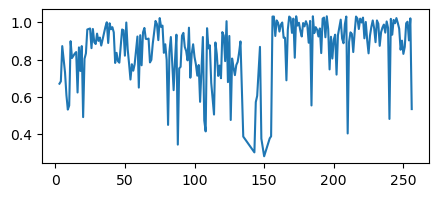

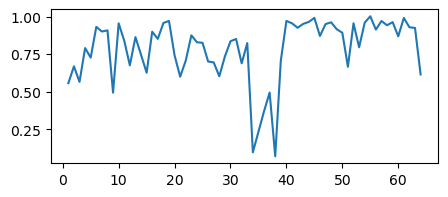

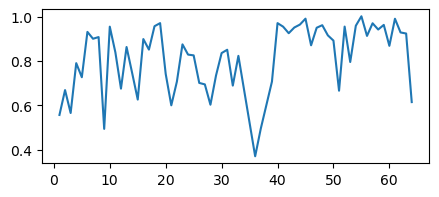

lenght after cleaning: 155097


In [7]:
df_abs = clean_with_25_rule(df_abs, var='abs637')

lenght before cleaning: 142562


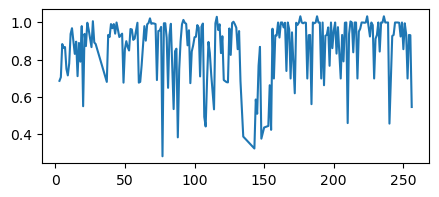

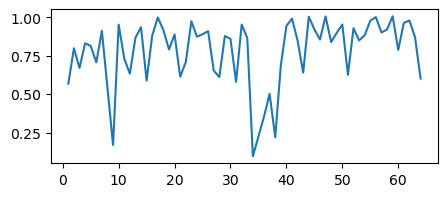

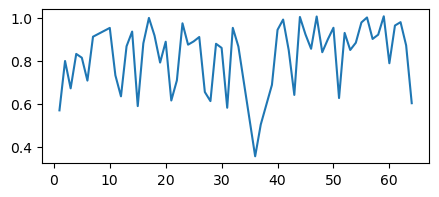

lenght after cleaning: 140029


In [8]:
df_rain = clean_with_25_rule(df_rain, var='tp_era5')

lenght before cleaning: 143493


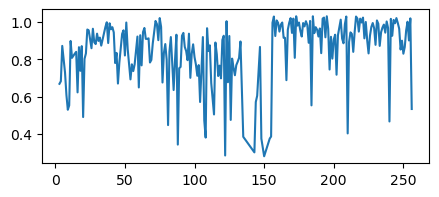

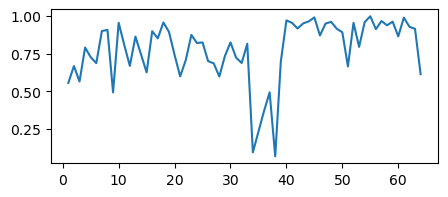

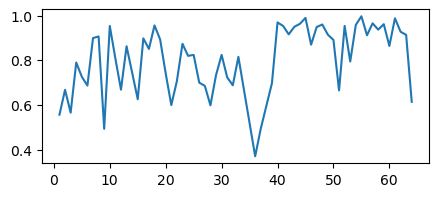

lenght after cleaning: 141753


In [9]:
df_fire = clean_with_25_rule(df_fire, var=var_fire)

In [10]:
df_rain.head(2)

fraction_241   tp_era5  RAINFALL           timestamp  \
arrival_time                                                                
2002-03-08 14:00:00           1.0  6.328704  3.969907 2002-03-08 14:00:00   
2002-03-08 15:00:00           1.0  6.259259  3.277778 2002-03-08 15:00:00   

                     day  month  year  year_num  month_ordinal  month_num  \
arrival_time                                                                
2002-03-08 14:00:00    8      3  2002         1              3          3   
2002-03-08 15:00:00    8      3  2002         1              3          3   

                    season_abb  season_name season_abb_year  season_ordinal  \
arrival_time                                                                  
2002-03-08 14:00:00        AHZ  Arctic Haze        AHZ_2002               1   
2002-03-08 15:00:00        AHZ  Arctic Haze        AHZ_2002               1   

                     ordinal  DOY  
arrival_time                       
2002-03-08 14:00:00        1   67  
2002-03-08 15:00:00        1   67

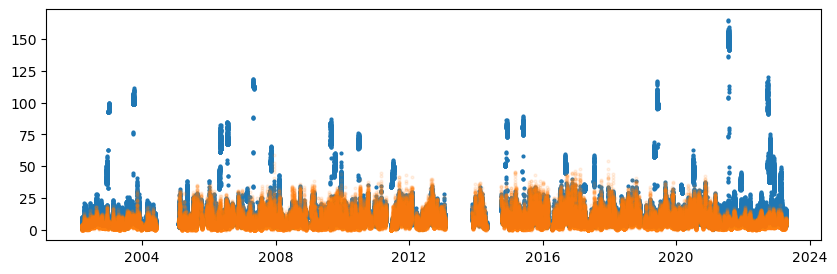

In [11]:
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(df_rain.index, df_rain['tp_era5'], 'o', ms=2)
ax.plot(df_rain.index, df_rain['RAINFALL'], 'o', ms=2, alpha=.1)
plt.show()

In [12]:
df_DOY_50_abs, df_percentile_DOY_95_abs, df_DOY_95_abs, df_DOY_99_abs, df_DOY_01_abs = extremes.produce_differeent_rolling_quantiles(df_abs, var='abs637')
df_DOY_50_rain, df_percentile_DOY_95_rain, df_DOY_95_rain, df_DOY_99_rain, df_DOY_01_rain = extremes.produce_differeent_rolling_quantiles(df_rain, 
                                                                                                                                var=var_rain)
df_DOY_50_fire, df_percentile_DOY_95_fire, df_DOY_95_fire, df_DOY_99_fire, df_DOY_01_fire = extremes.produce_differeent_rolling_quantiles(df_fire, 
                                                                                                                                var=var_fire)

In [13]:
def produce_differeent_rolling_quantiles(df, var='abs637'):
    df_DOY_50 = calculate_rolling_quantile(df, var=var, quantile=.5, window=24*15)[1]
    df_percentile_DOY_95, df_DOY_95 = calculate_rolling_quantile(df, var=var, quantile=.95, window=24*15)
    df_DOY_99 = calculate_rolling_quantile(df, var=var, quantile=.99, window=24*15)[1]
    df_DOY_01 = calculate_rolling_quantile(df, var=var, quantile=.01, window=24*15)[1]
    return df_DOY_50, df_percentile_DOY_95, df_DOY_95, df_DOY_99, df_DOY_01

# New methods: 

In [14]:
def create_df_of_percentiles(df, top_percentiles=[99,98,97,96,95,90,80,70,60,50],  var='abs637'):
    df_percentiles = pd.DataFrame()
    bottom_percentiles = [100-x for x in top_percentiles]
    percentiles = top_percentiles + bottom_percentiles 
    for percentile in percentiles:
        df_rolling, df_percentile_DOY = extremes.calculate_rolling_quantile(df, var, quantile=percentile/100, window=24*15)
        df_percentiles['percentile_'+str(percentile)] = df_percentile_DOY[var]
    return df_percentiles

def quantiles_df(df, df_percentiles, var, percentile):
    print(df_percentiles.columns)       
    df_DOY_top = df_percentiles[['percentile_'+str(percentile)]].copy()
    df_DOY_top = df_DOY_top.rename(columns={'percentile_'+str(percentile):str(var)+'_DOY_quantile_top'})    
    df_DOY_bottom = df_percentiles[['percentile_'+str(100-percentile)]].copy()
    df_DOY_bottom = df_DOY_bottom.rename(columns={'percentile_'+str(100-percentile):str(var)+'_DOY_quantile_bottom'})    
    df = pd.merge(df, df_DOY_top[[str(var)+'_DOY_quantile_top']], on='DOY')    
    df = pd.merge(df, df_DOY_bottom[[str(var)+'_DOY_quantile_bottom']], on='DOY')
    return df

In [15]:
df_GFED.head(2)

BC_GFED
arrival_time                
2002-03-08 14:00:00      0.0
2002-03-08 15:00:00      0.0

In [16]:
df.head(2)

abs637  fraction_241   tp_era5  RAINFALL
2002-03-08 14:00:00   0.238           1.0  6.328704  3.969907
2002-03-08 15:00:00   0.082           1.0  6.259259  3.277778

Index(['percentile_99', 'percentile_98', 'percentile_97', 'percentile_96',
       'percentile_95', 'percentile_90', 'percentile_80', 'percentile_70',
       'percentile_60', 'percentile_50', 'percentile_1', 'percentile_2',
       'percentile_3', 'percentile_4', 'percentile_5', 'percentile_10',
       'percentile_20', 'percentile_30', 'percentile_40'],
      dtype='object')
High outliers (proportion)
0.06647463166797021
Low outliers (proportion)
0.015311929697385908


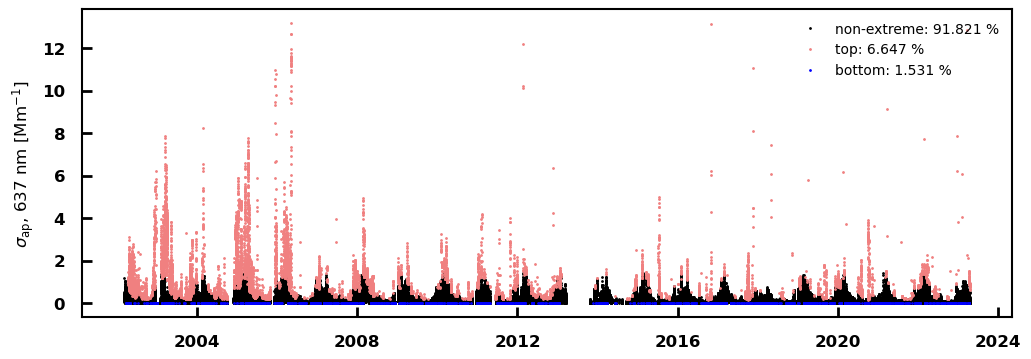

Save as: C:\Users\DominicHeslinRees\Documents\Analysis\HYSPLIT\extremes\df_abs637_extremes_99.dat
Index(['percentile_99', 'percentile_98', 'percentile_97', 'percentile_96',
       'percentile_95', 'percentile_90', 'percentile_80', 'percentile_70',
       'percentile_60', 'percentile_50', 'percentile_1', 'percentile_2',
       'percentile_3', 'percentile_4', 'percentile_5', 'percentile_10',
       'percentile_20', 'percentile_30', 'percentile_40'],
      dtype='object')
High outliers (proportion)
0.08657987401972475
Low outliers (proportion)
0.051430254906637114


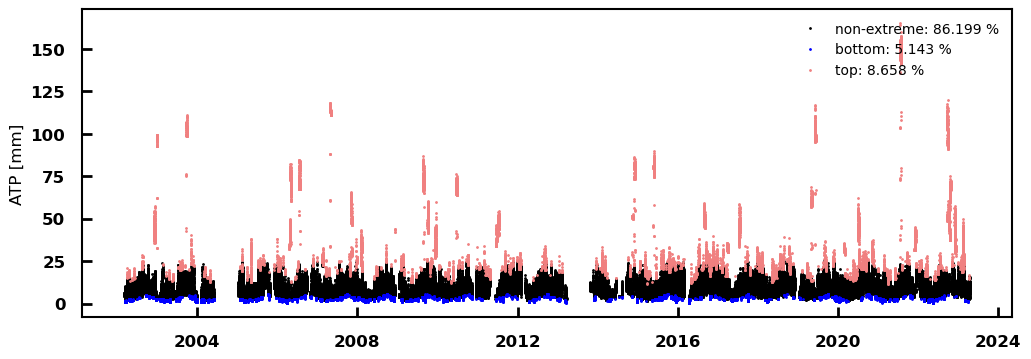

Save as: C:\Users\DominicHeslinRees\Documents\Analysis\HYSPLIT\extremes\df_tp_era5_extremes_99.dat
Index(['percentile_99', 'percentile_98', 'percentile_97', 'percentile_96',
       'percentile_95', 'percentile_90', 'percentile_80', 'percentile_70',
       'percentile_60', 'percentile_50', 'percentile_1', 'percentile_2',
       'percentile_3', 'percentile_4', 'percentile_5', 'percentile_10',
       'percentile_20', 'percentile_30', 'percentile_40'],
      dtype='object')
High outliers (proportion)
0.02980633201619591
Low outliers (proportion)
0.0


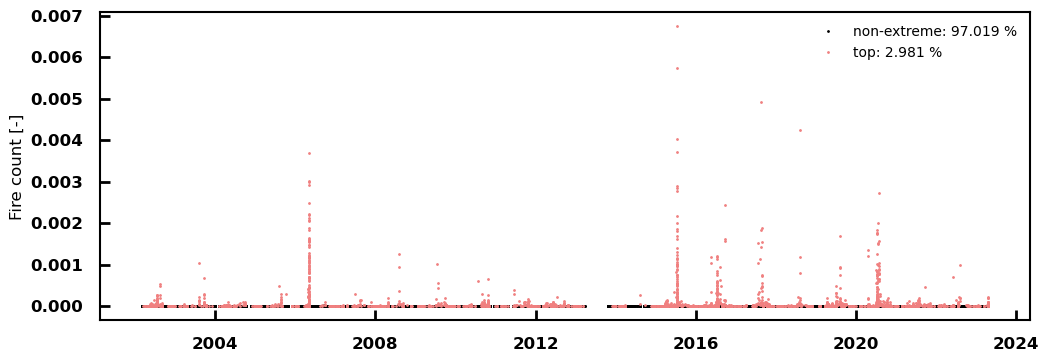

Save as: C:\Users\DominicHeslinRees\Documents\Analysis\HYSPLIT\extremes\df_BC_GFED_extremes_99.dat


In [17]:
variables = ['abs637', var_rain, var_fire]
DFs = [df_abs637, df_era5_GDAS, df_GFED]

ylabels = ['$\sigma_{\mathrm{ap}}$, 637 nm [Mm$^{-1}$]', 'ATP [mm]', 'Fire count [-]']

dict_var_to_ylabel = dict(zip(variables, ylabels))

var='abs637'
percentile = 99

for var, df in zip(variables, DFs):
    df = extremes.add_datetime_columns_and_resample_D(df)
    df_percentiles = create_df_of_percentiles(df, top_percentiles=[99,98,97,96,95,90,80,70,60,50], 
                                                  var=var)
    df  = quantiles_df(df, df_percentiles, var=var, percentile=percentile)
    df = extremes.add_outlier(df, var=var)
    df = df[[var,'timestamp','outlier']].copy()
    
    fig = extremes.plot_outliers(df, var, datetime_col='timestamp',
                                ylabel=dict_var_to_ylabel[var])
    
    df = df.set_index('timestamp')
    
    extremes.save_df(df, path=r'C:\Users\DominicHeslinRees\Documents\Analysis\HYSPLIT\extremes', 
              name='df_'+str(var)+'_extremes_'+str(percentile))

In [18]:
df.head(2)

BC_GFED  outlier
timestamp                            
2002-03-08 14:00:00      0.0        0
2002-03-08 15:00:00      0.0        0

In [19]:
df_DOY_50_fire.head(2)

BC_GFED  day  month    year  year_num  month_ordinal  month_num  \
DOY                                                                    
1        0.0  8.0    1.0  2013.0      12.0          133.0        1.0   
2        0.0  8.0    1.0  2013.0      12.0          133.0        1.0   

     season_ordinal  ordinal  
DOY                           
1              33.0   3955.0  
2              33.0   3956.0

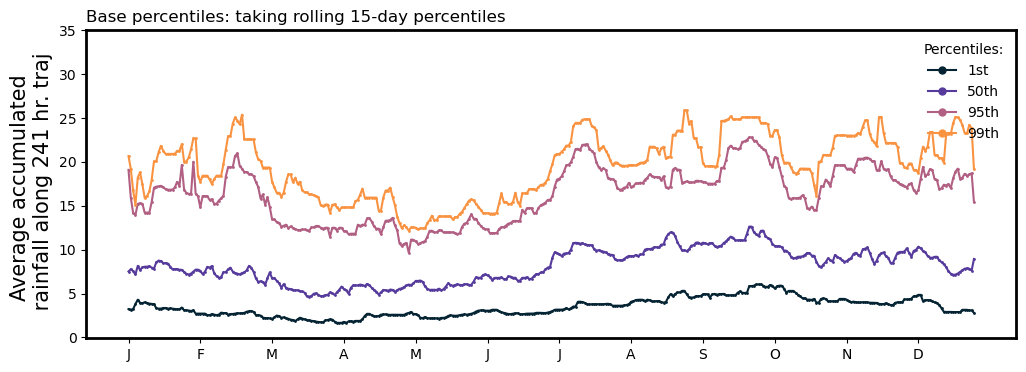

['C:\\Users\\DominicHeslinRees\\Pictures\\black_carbon\\final_plots']
make folder
saved as: C:\Users\DominicHeslinRees\Pictures\black_carbon\final_plots\\percentiles_extreme_rain.jpeg
['C:\\Users\\DominicHeslinRees\\Pictures\\black_carbon\\final_plots']
make folder
saved as: C:\Users\DominicHeslinRees\Pictures\black_carbon\final_plots\\FigureS14.png


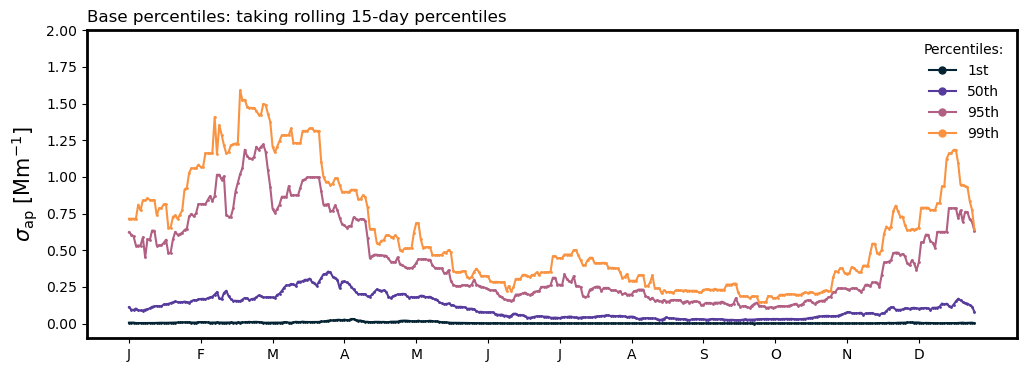

['C:\\Users\\DominicHeslinRees\\Pictures\\black_carbon\\final_plots']
make folder
saved as: C:\Users\DominicHeslinRees\Pictures\black_carbon\final_plots\\percentiles_extreme_abs.jpeg
['C:\\Users\\DominicHeslinRees\\Pictures\\black_carbon\\final_plots']
make folder
saved as: C:\Users\DominicHeslinRees\Pictures\black_carbon\final_plots\\FigureS15.png


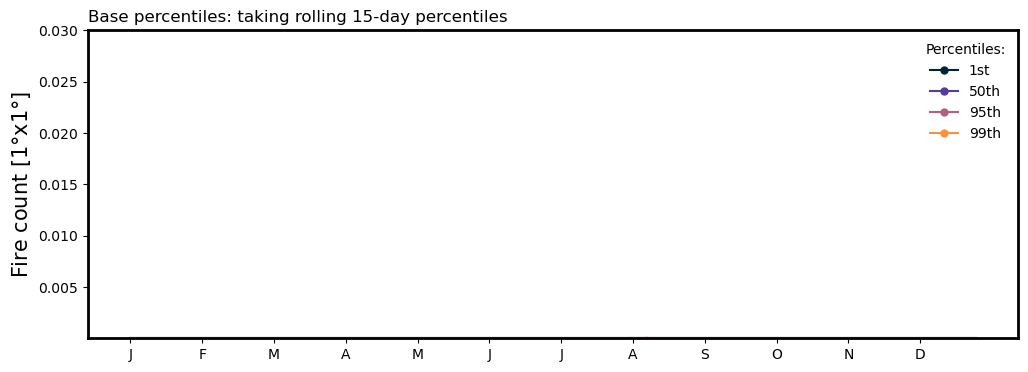

['C:\\Users\\DominicHeslinRees\\Pictures\\black_carbon\\final_plots']
make folder
saved as: C:\Users\DominicHeslinRees\Pictures\black_carbon\final_plots\\percentiles_extreme_firecount.jpeg


In [20]:
fig = extremes.plot_percentiles(df_DOY_01_rain, df_DOY_50_rain, df_DOY_95_rain, df_DOY_99_rain, var=var_rain, 
                  ylabel='Average accumulated \n rainfall along 241 hr. traj', ms=1, ymax=35)
extremes.save_plot(fig, name='percentiles_extreme_rain')
extremes.save_plot(fig, name='FigureS14', formate='.png', dpi=300)

fig = extremes.plot_percentiles(df_DOY_01_abs, df_DOY_50_abs, df_DOY_95_abs, df_DOY_99_abs, var='abs637', 
                  ylabel='$\sigma_{\mathrm{ap}}$ [Mm$^{-1}$]', ms=1, ymax=2)
extremes.save_plot(fig, name='percentiles_extreme_abs')
extremes.save_plot(fig, name='FigureS15', formate='.png', dpi=300)

fig = extremes.plot_percentiles(df_DOY_01_fire, df_DOY_50_fire, df_DOY_95_fire, df_DOY_99_fire, var=var_fire, 
                  ylabel='Fire count [1$\degree$x1$\degree$]', ms=1, ymin=10**(-8), ymax=.03)
extremes.save_plot(fig, name='percentiles_extreme_firecount')

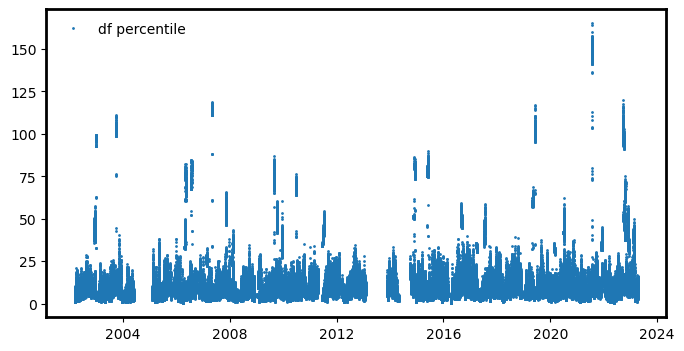

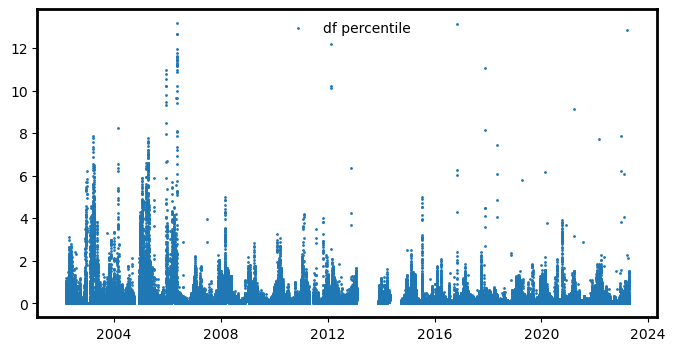

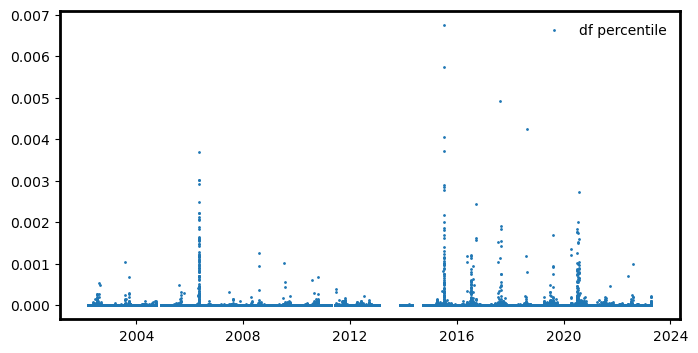

In [21]:
fig = extremes.plot_timeseries(df_percentile_DOY_95_rain, var=var_rain)
fig = extremes.plot_timeseries(df_percentile_DOY_95_abs, var='abs637')
fig = extremes.plot_timeseries(df_percentile_DOY_95_fire, var=var_fire)

In [22]:
df_DOY_95_abs.head(2)

abs637   day  month    year  year_num  month_ordinal  month_num  \
DOY                                                                     
1    0.62350  31.0   12.0  2013.0      12.0          133.0       12.0   
2    0.60725  31.0   12.0  2013.0      12.0          133.0       12.0   

     season_ordinal  ordinal  
DOY                           
1              33.0   3960.0  
2              33.0   3961.0

In [23]:
df_percentile_DOY_95_abs['DOY'].values

array([ 67.,  67.,  67., ..., 107., 107., 107.])

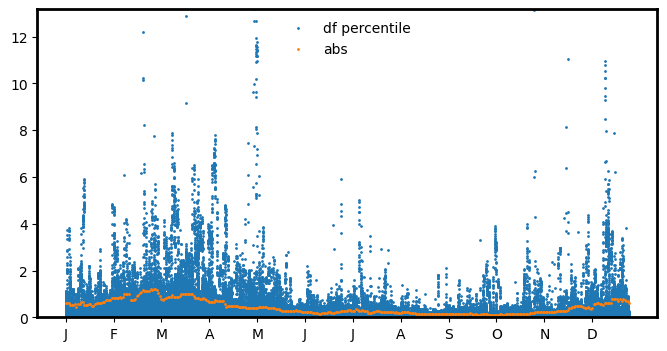

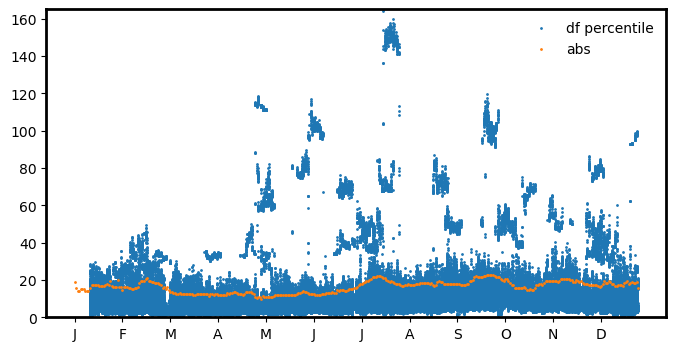

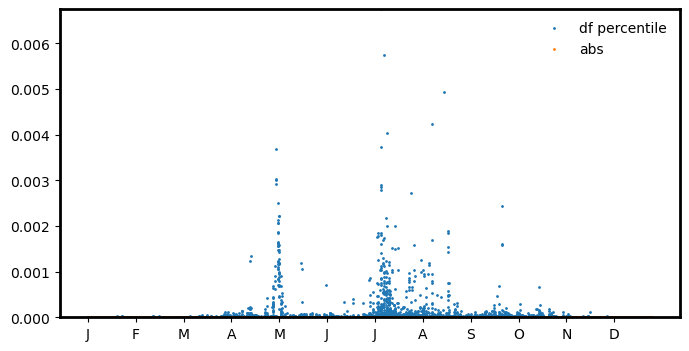

In [24]:
fig = extremes.quick_plot(df_percentile_DOY_95_abs, df_DOY_95_abs, var='abs637')
fig = extremes.quick_plot(df_percentile_DOY_95_rain, df_DOY_95_rain, var=var_rain)
fig = extremes.quick_plot(df_percentile_DOY_95_fire, df_DOY_95_fire, var=var_fire)

In [25]:
df_rain.head(2)

fraction_241   tp_era5  RAINFALL           timestamp  \
arrival_time                                                                
2002-03-08 14:00:00           1.0  6.328704  3.969907 2002-03-08 14:00:00   
2002-03-08 15:00:00           1.0  6.259259  3.277778 2002-03-08 15:00:00   

                     day  month  year  year_num  month_ordinal  month_num  \
arrival_time                                                                
2002-03-08 14:00:00    8      3  2002         1              3          3   
2002-03-08 15:00:00    8      3  2002         1              3          3   

                    season_abb  season_name season_abb_year  season_ordinal  \
arrival_time                                                                  
2002-03-08 14:00:00        AHZ  Arctic Haze        AHZ_2002               1   
2002-03-08 15:00:00        AHZ  Arctic Haze        AHZ_2002               1   

                     ordinal  DOY  
arrival_time                       
2002-03-08 14:00:00        1   67  
2002-03-08 15:00:00        1   67

In [26]:
df_add_DOY_quantile_D_rain, df_add_DOY_quantile_rain  = extremes.quantiles_df(df_rain, df_rain_D, df_DOY_99_rain, df_DOY_01_rain, var=var_rain)
df_add_DOY_quantile_D_abs, df_add_DOY_quantile_abs = extremes.quantiles_df(df_abs, df_abs_D, df_DOY_99_abs,  df_DOY_01_abs, var='abs637')
df_add_DOY_quantile_D_fire, df_add_DOY_quantile_fire = extremes.quantiles_df(df_fire, df_fire_D, df_DOY_99_fire,  df_DOY_01_fire, var=var_fire)

In [27]:
df_add_DOY_quantile_abs = extremes.add_outlier(df_add_DOY_quantile_abs, var='abs637')
df_add_DOY_quantile_rain = extremes.add_outlier(df_add_DOY_quantile_rain, var=var_rain)
df_add_DOY_quantile_fire = extremes.add_outlier(df_add_DOY_quantile_fire, var=var_fire)

df_add_DOY_quantile_D_abs = extremes.add_outlier(df_add_DOY_quantile_D_abs, var='abs637')
df_add_DOY_quantile_D_rain = extremes.add_outlier(df_add_DOY_quantile_D_rain, var=var_rain)
df_add_DOY_quantile_D_fire = extremes.add_outlier(df_add_DOY_quantile_D_fire, var=var_fire)

High outliers (proportion)
0.06568792433122497
Low outliers (proportion)
0.0150035139299922
High outliers (proportion)
0.08621071349506174
Low outliers (proportion)
0.04999678637996415
High outliers (proportion)
0.029170458473542007
Low outliers (proportion)
0.0
High outliers (proportion)
0.05758008040461678
Low outliers (proportion)
0.0027233821812994424
High outliers (proportion)
0.06341589936454416
Low outliers (proportion)
0.02775256127609908
High outliers (proportion)
0.06964077292180003
Low outliers (proportion)
0.0


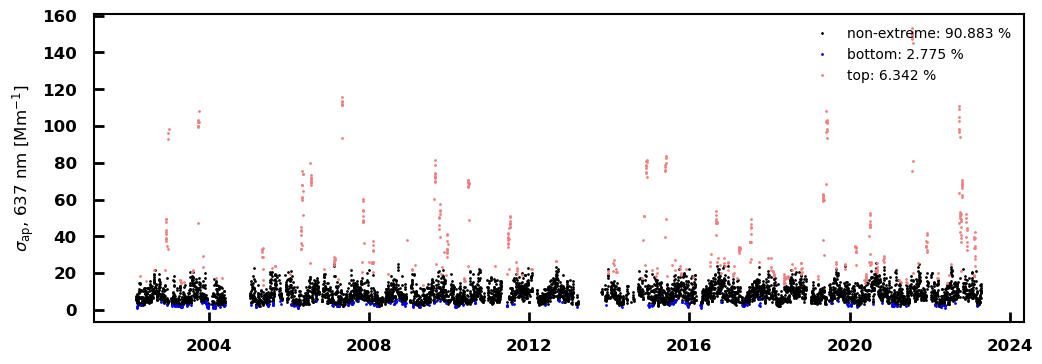

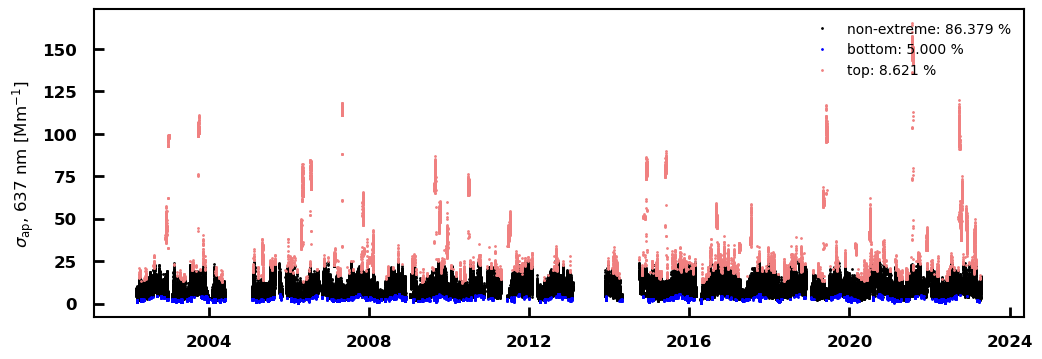

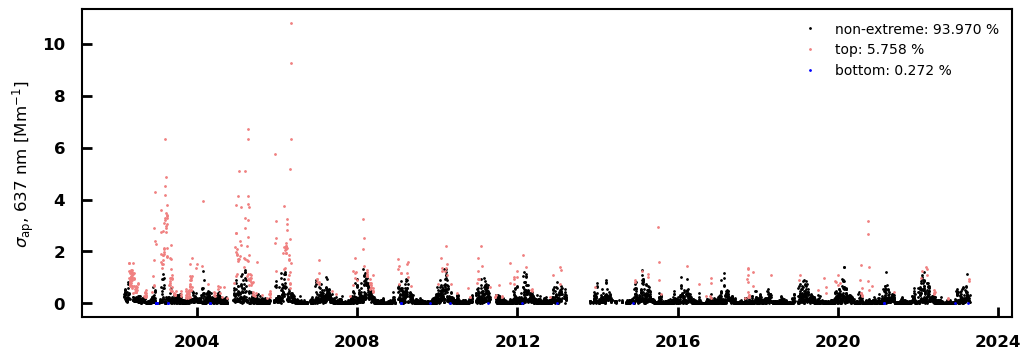

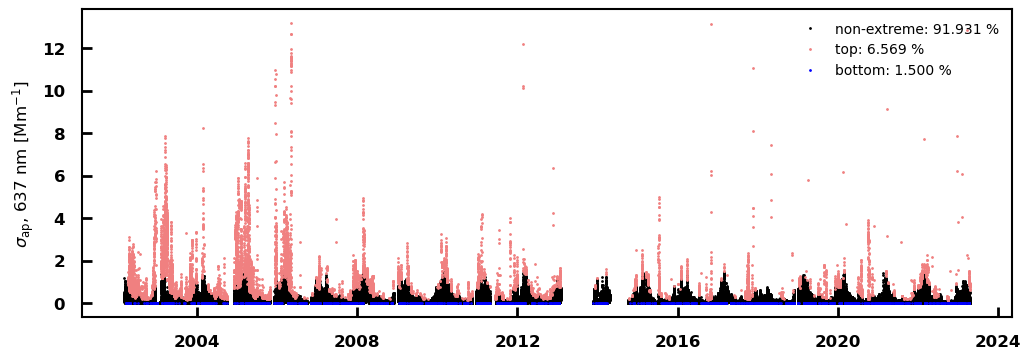

['C:\\Users\\DominicHeslinRees\\Pictures\\black_carbon\\final_plots']
make folder
saved as: C:\Users\DominicHeslinRees\Pictures\black_carbon\final_plots\\outliers_timeseries_abs.jpeg


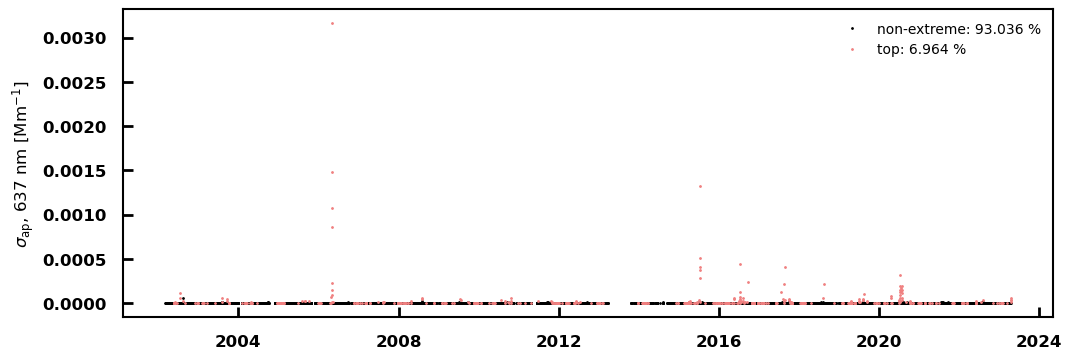

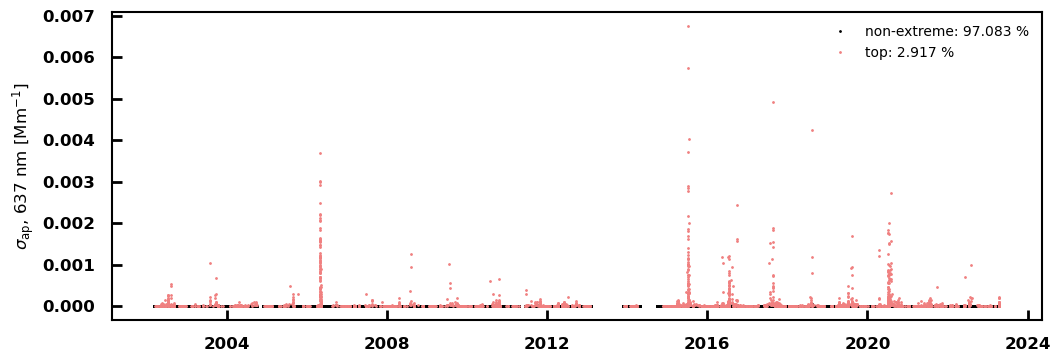

In [28]:
fig = extremes.plot_outliers(df_add_DOY_quantile_D_rain, var=var_rain, datetime_col='datetime')
fig = extremes.plot_outliers(df_add_DOY_quantile_rain, var=var_rain, datetime_col='timestamp')

fig = extremes.plot_outliers(df_add_DOY_quantile_D_abs, var='abs637', datetime_col='datetime')
fig = extremes.plot_outliers(df_add_DOY_quantile_abs, var='abs637', datetime_col='timestamp')
extremes.save_plot(fig, name='outliers_timeseries_abs')

fig = extremes.plot_outliers(df_add_DOY_quantile_D_fire, var=var_fire, datetime_col='datetime')
fig = extremes.plot_outliers(df_add_DOY_quantile_fire, var=var_fire, datetime_col='timestamp')

In [29]:
df_add_DOY_quantile_rain.head(2)

fraction_241   tp_era5  RAINFALL           timestamp  day  month  year  \
0           1.0  6.328704  3.969907 2002-03-08 14:00:00    8      3  2002   
1           1.0  6.259259  3.277778 2002-03-08 15:00:00    8      3  2002   

   year_num  month_ordinal  month_num season_abb  season_name season_abb_year  \
0         1              3          3        AHZ  Arctic Haze        AHZ_2002   
1         1              3          3        AHZ  Arctic Haze        AHZ_2002   

   season_ordinal  ordinal  DOY  tp_era5_DOY_quantile_top  \
0               1        1   67                 16.041667   
1               1        1   67                 16.041667   

   tp_era5_DOY_quantile_bottom  outlier  
0                     2.247106        0  
1                     2.247106        0

# By season: 

Frequency: 3


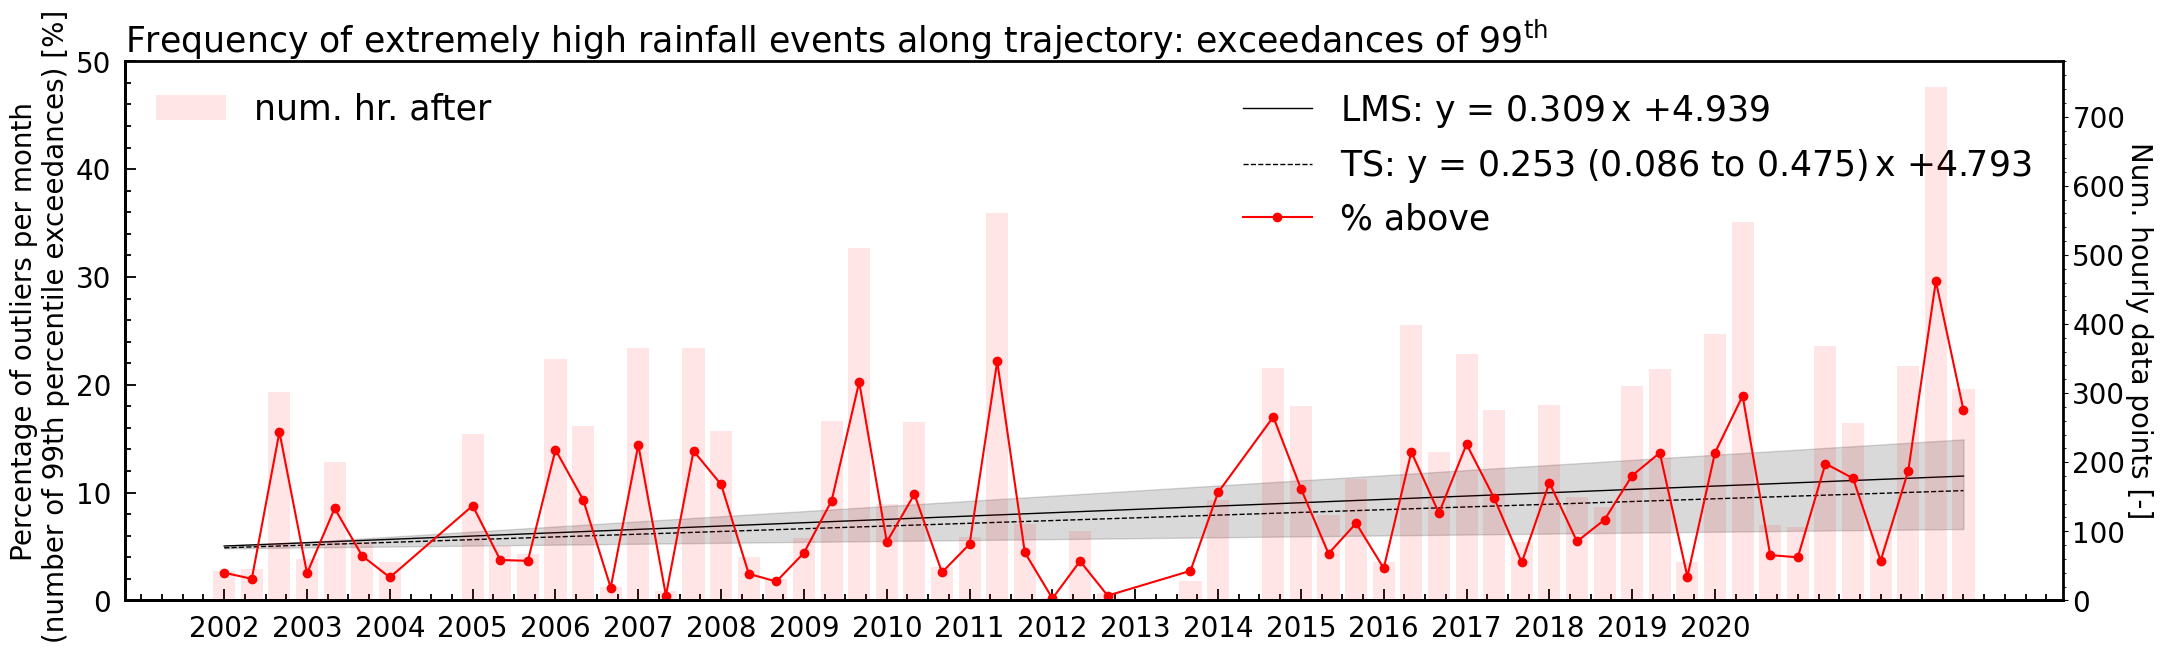

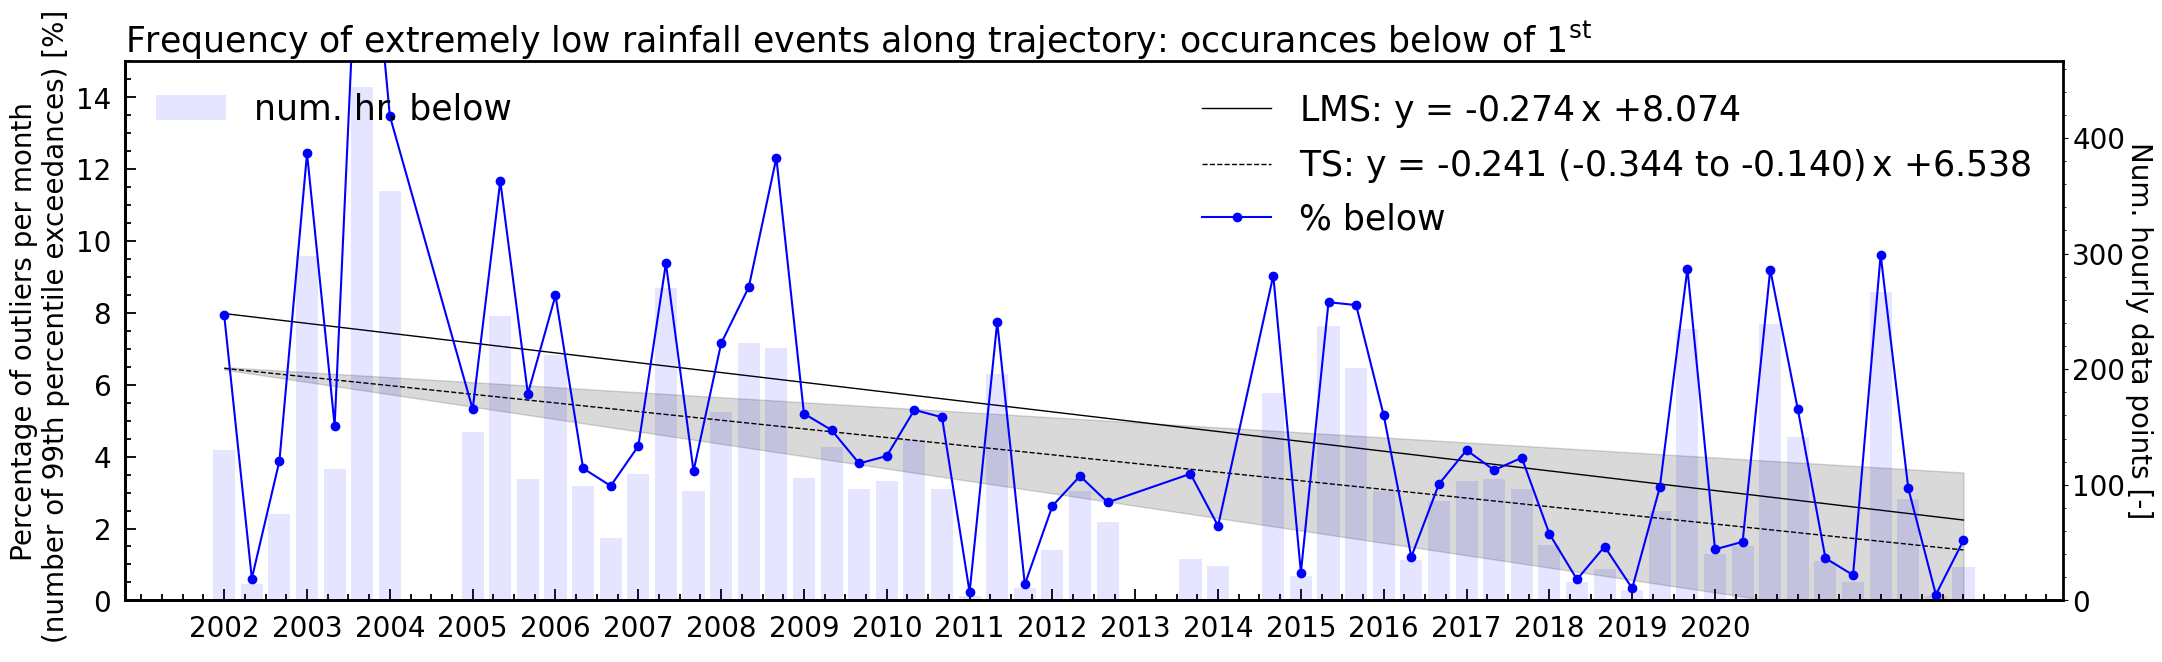

In [30]:
fig_high, fig_low = extremes.find_fractions_plot(df_add_DOY_quantile_rain, var=var_rain, resolution='season_ordinal',
                        events='rainfall', percentile=99, ymax_high=50, ymax_low=15, plot_bottom=False,
                        plot_top=False, start_year=2002)

Frequency: 3


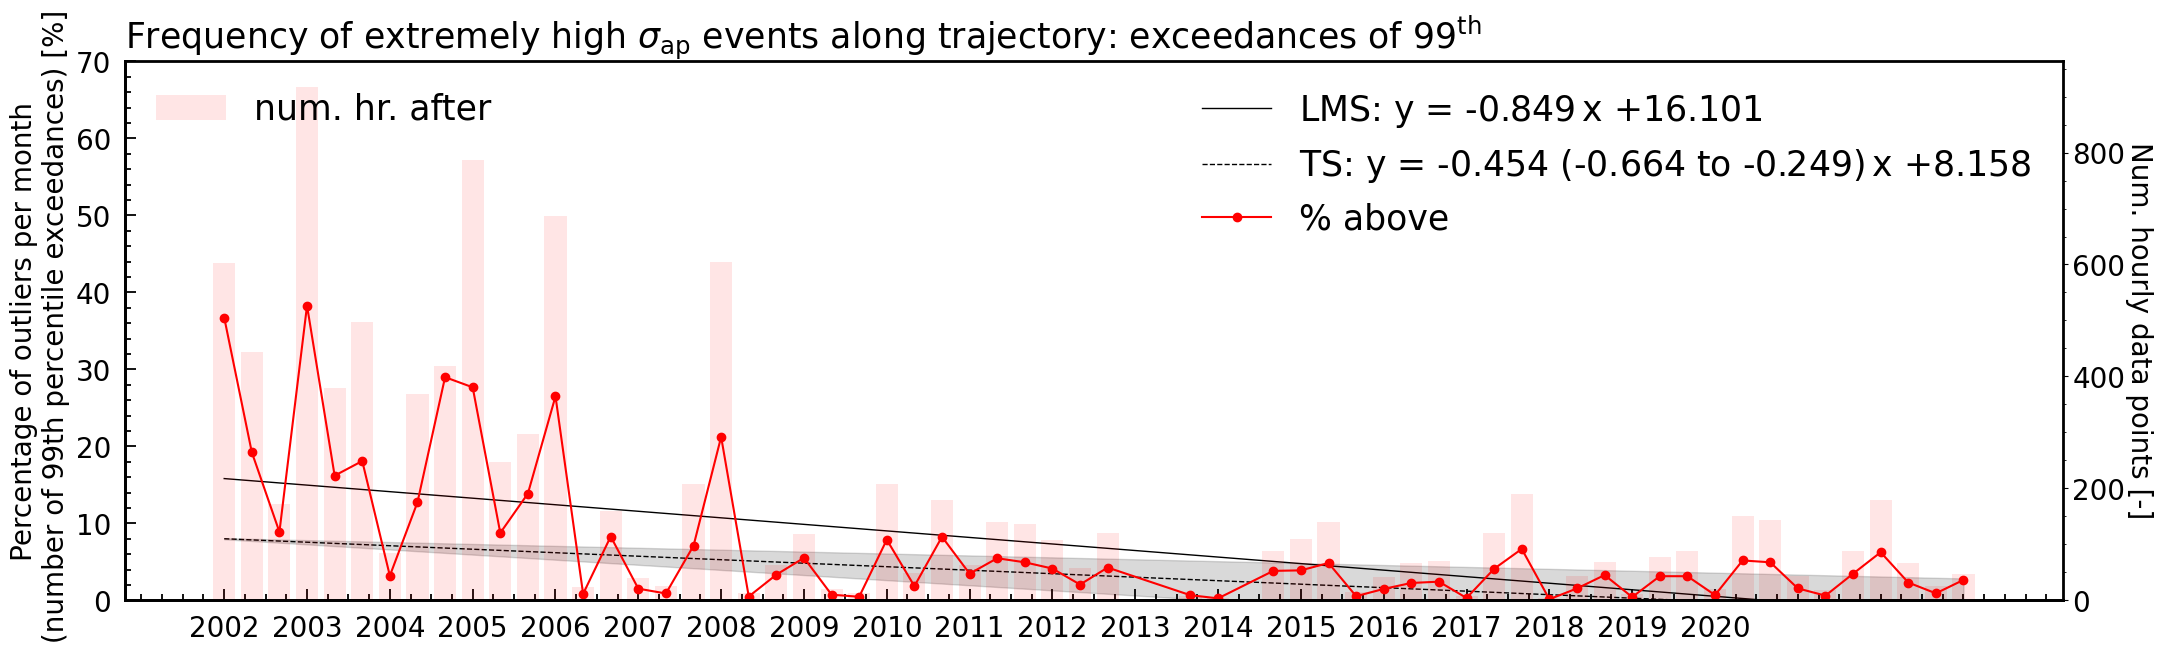

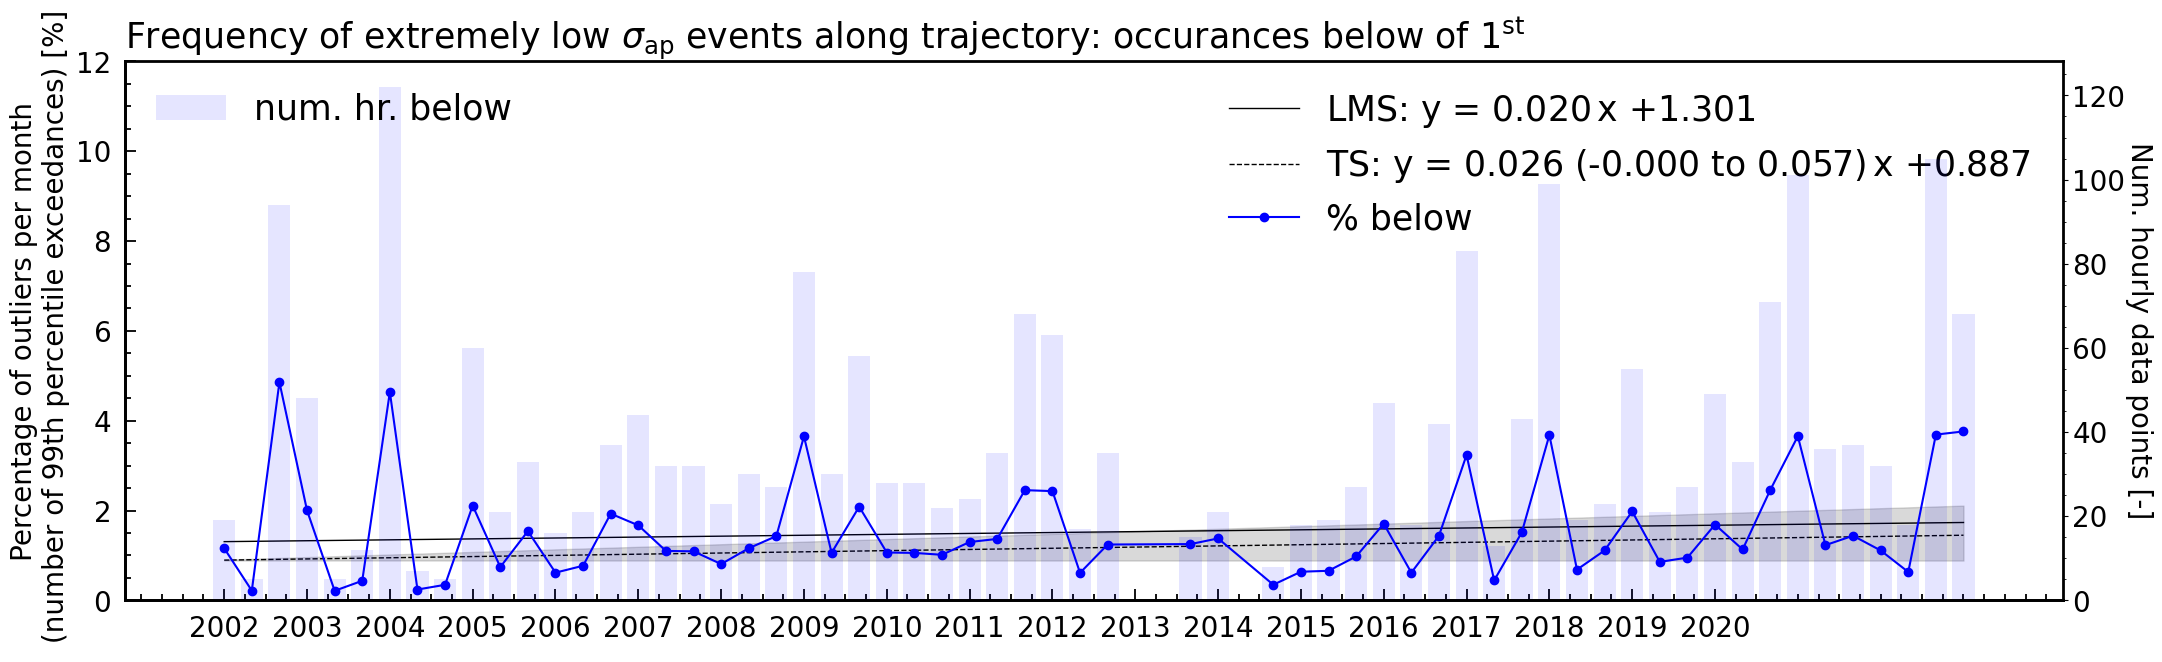

In [31]:
fig_high, fig_low = extremes.find_fractions_plot(df_add_DOY_quantile_abs, var='abs637', resolution='season_ordinal',
                        events='$\sigma_{\mathrm{ap}}$', percentile=99, ymax_high=70, ymax_low=12, plot_bottom=False,
                        plot_top=False)

### Fire 

Frequency: 3


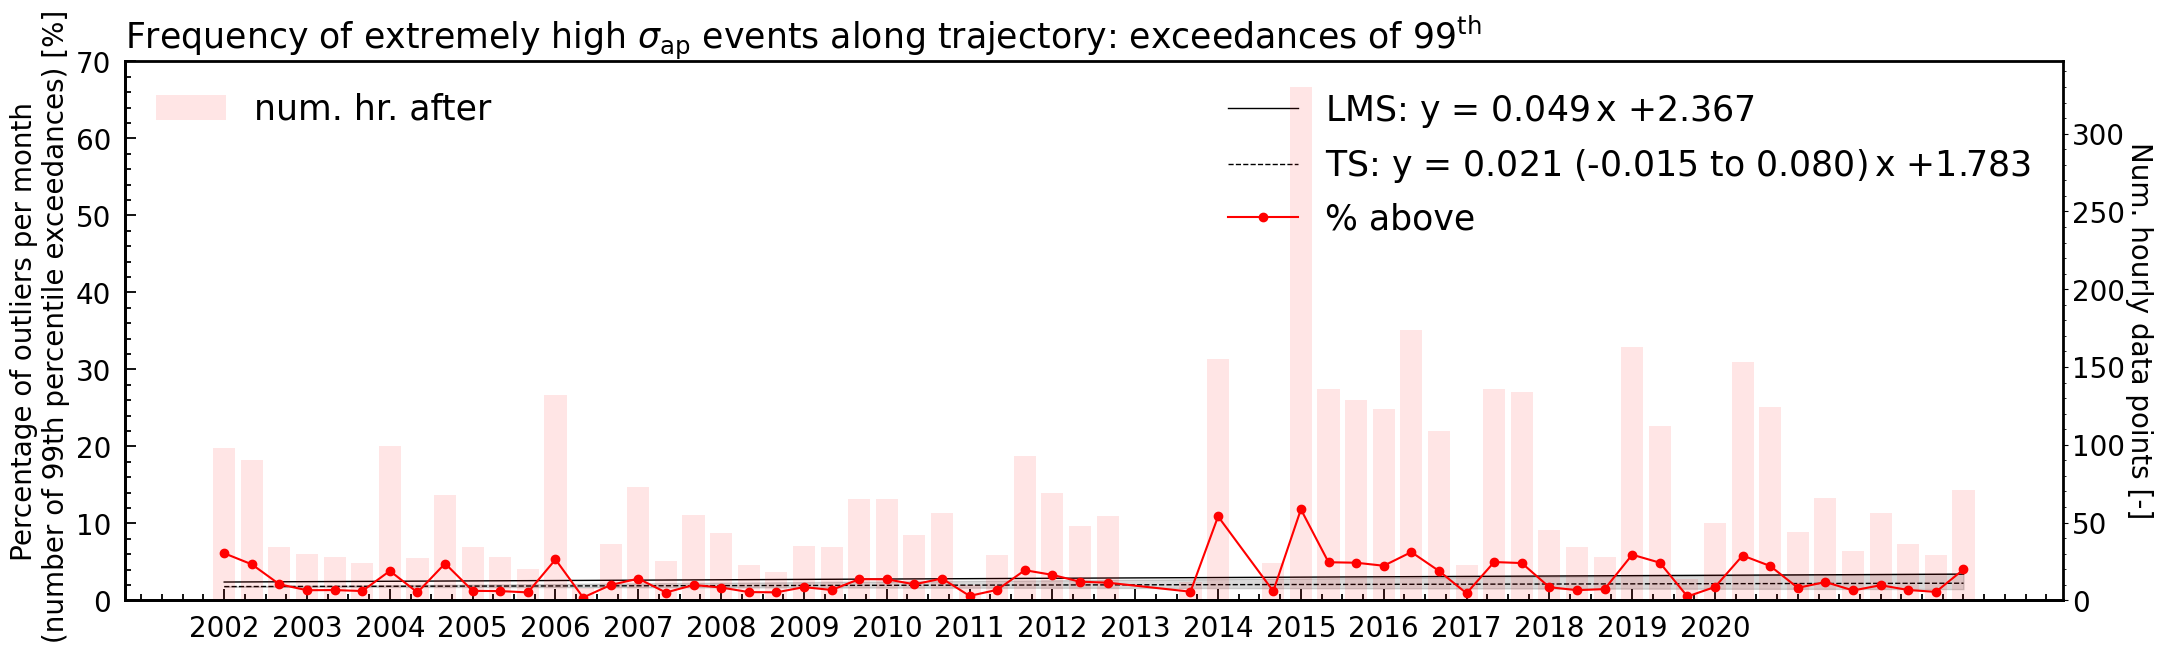

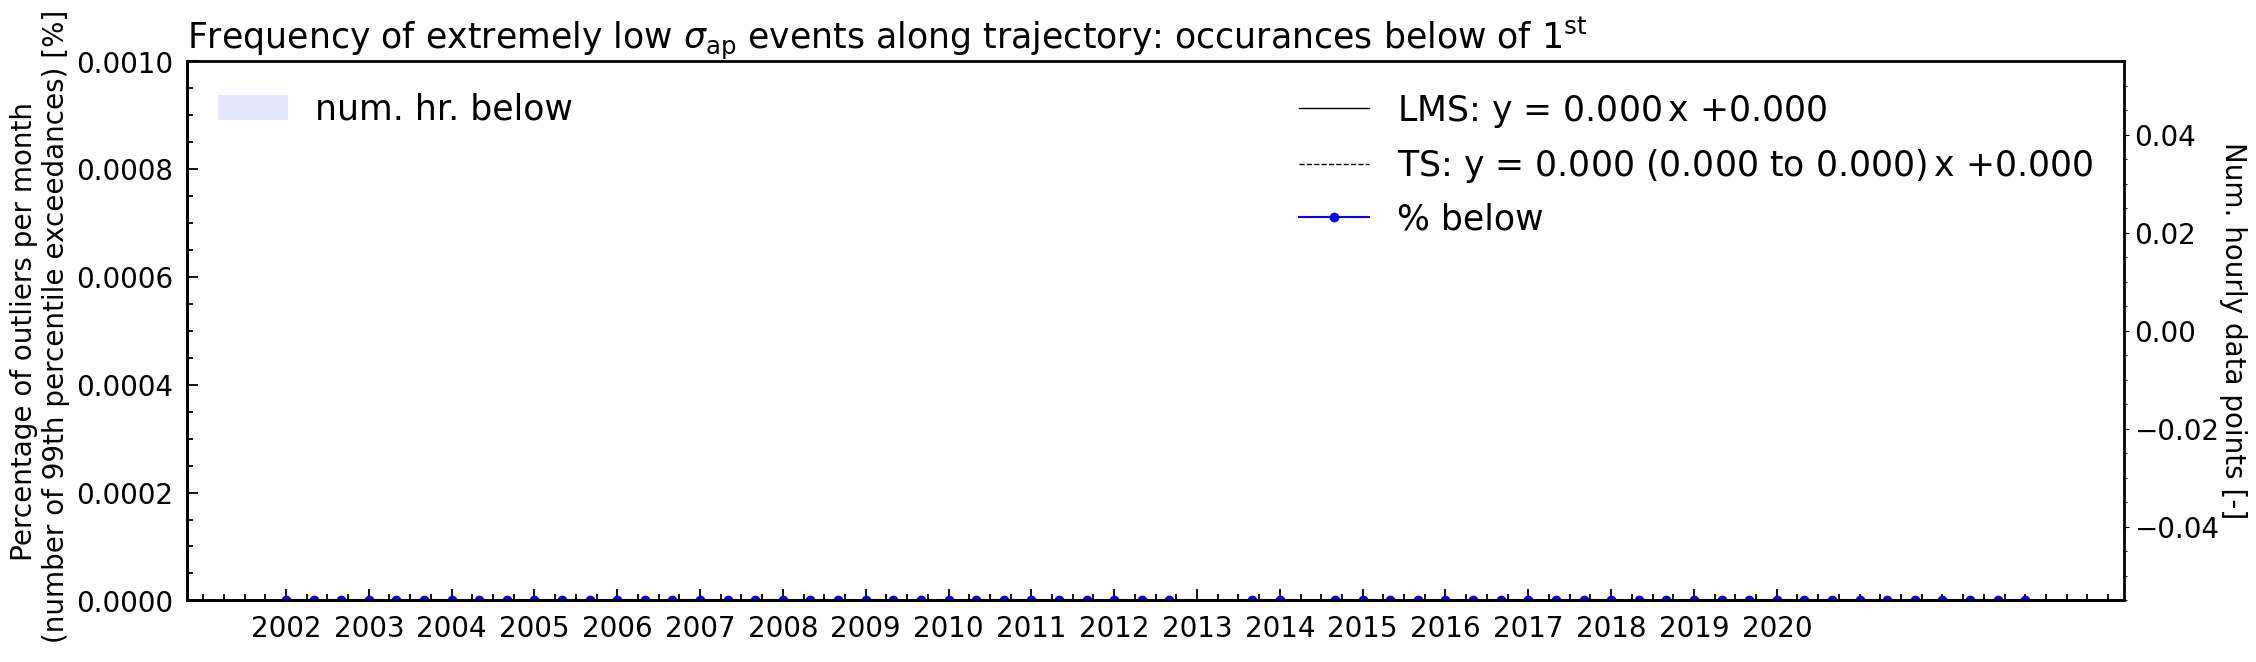

In [32]:
fig_high, fig_low = extremes.find_fractions_plot(df_add_DOY_quantile_fire, var=var_fire, resolution='season_ordinal',
                        events='$\sigma_{\mathrm{ap}}$', percentile=99, ymax_high=70, ymax_low=0.001, plot_bottom=False,
                        plot_top=False)

# Monthly resolution: 

Frequency: 12


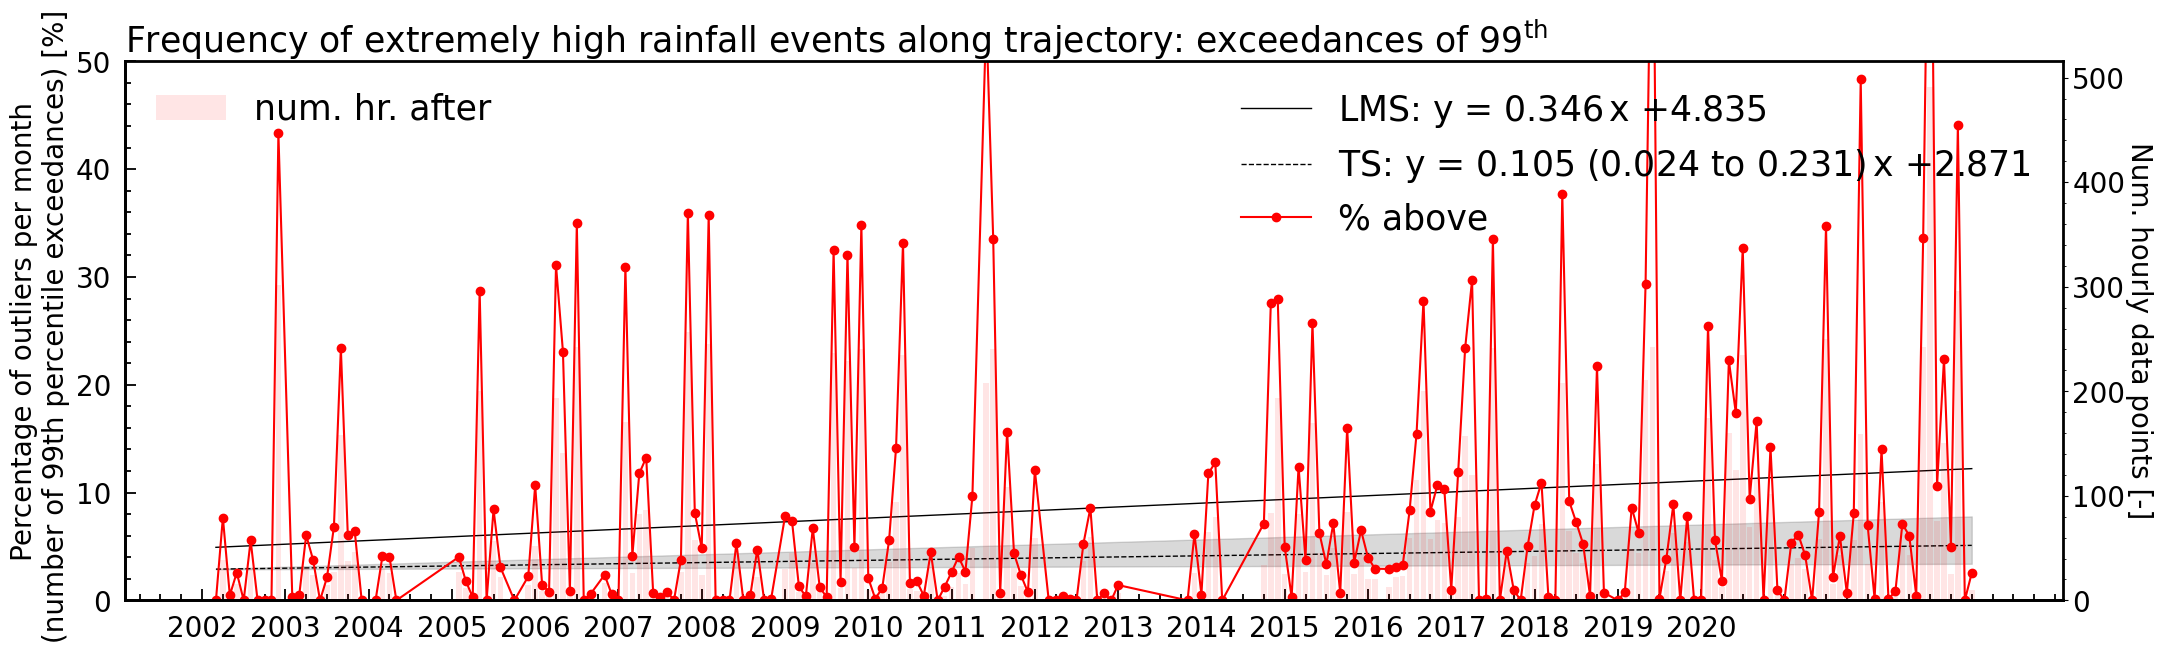

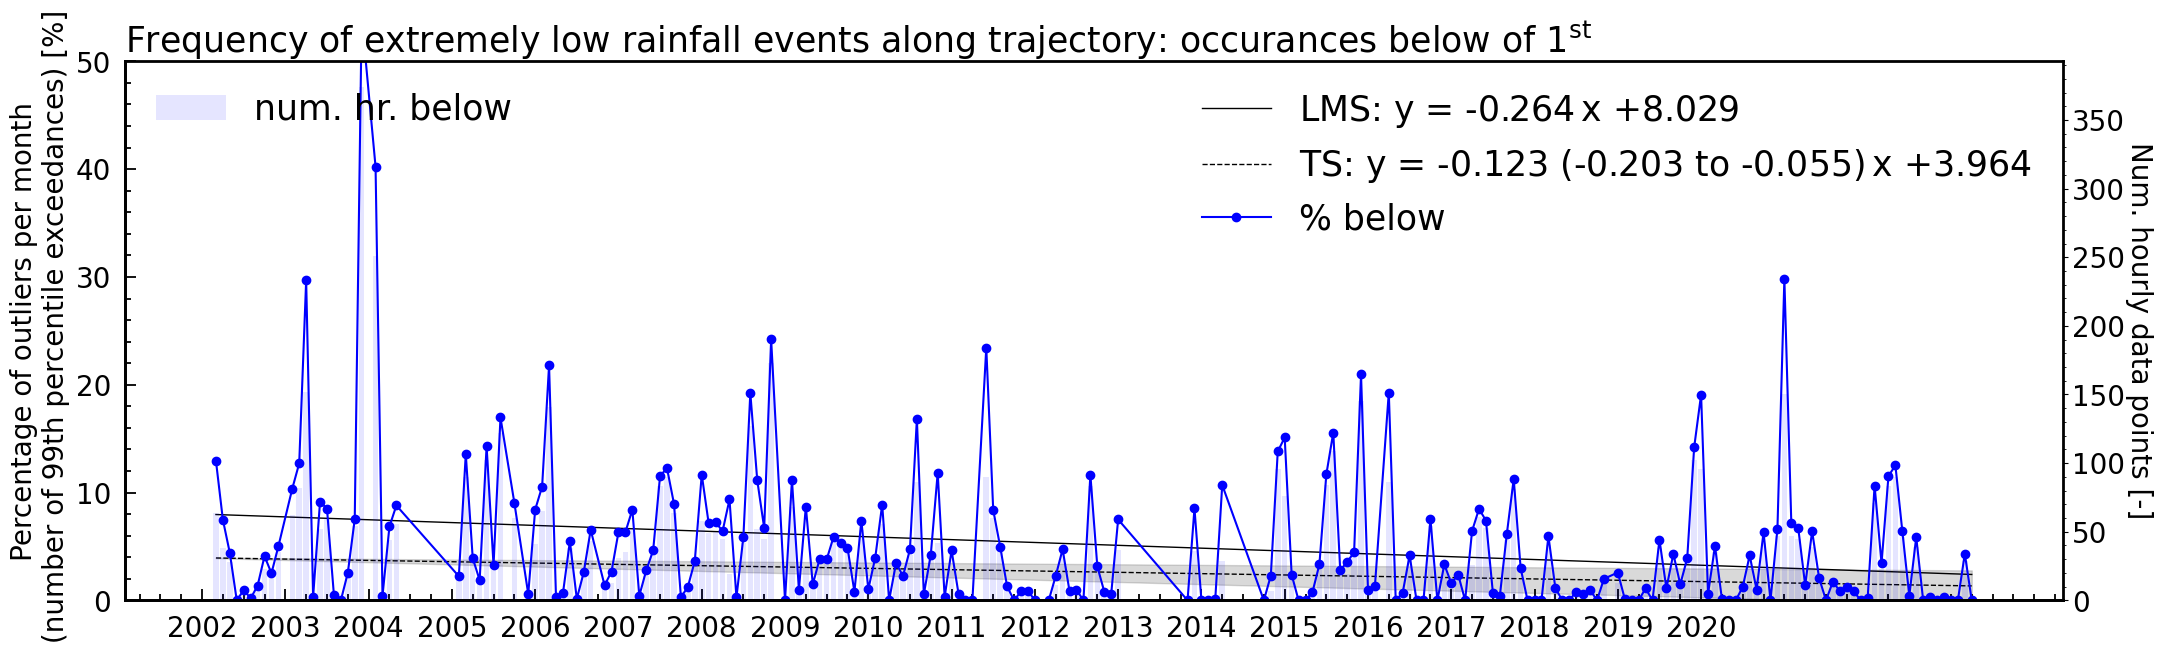

['C:\\Users\\DominicHeslinRees\\Pictures\\black_carbon\\final_plots']
make folder
saved as: C:\Users\DominicHeslinRees\Pictures\black_carbon\final_plots\\monthly_freq_rain_high_outliers.jpeg
['C:\\Users\\DominicHeslinRees\\Pictures\\black_carbon\\final_plots']
make folder
saved as: C:\Users\DominicHeslinRees\Pictures\black_carbon\final_plots\\monthly_freq_rain_low_outliers.jpeg


In [33]:
fig_high, fig_low = extremes.find_fractions_plot(df_add_DOY_quantile_rain, var=var_rain, resolution='month_ordinal',
                        events='rainfall', percentile=99, ymax_high=50, ymax_low=50, plot_bottom=False,
                        plot_top=False)
extremes.save_plot(fig_high, name='monthly_freq_rain_high_outliers')
extremes.save_plot(fig_low, name='monthly_freq_rain_low_outliers')

In [34]:
df_add_DOY_quantile_abs.head(2)

abs637           timestamp  day  month  year  year_num  month_ordinal  \
0   0.238 2002-03-08 14:00:00    8      3  2002         1              3   
1   0.082 2002-03-08 15:00:00    8      3  2002         1              3   

   month_num season_abb  season_name season_abb_year  season_ordinal  ordinal  \
0          3        AHZ  Arctic Haze        AHZ_2002               1        1   
1          3        AHZ  Arctic Haze        AHZ_2002               1        1   

   DOY  abs637_DOY_quantile_top  abs637_DOY_quantile_bottom  outlier  
0   67                   1.2845                     0.00725        0  
1   67                   1.2845                     0.00725        0

Frequency: 12


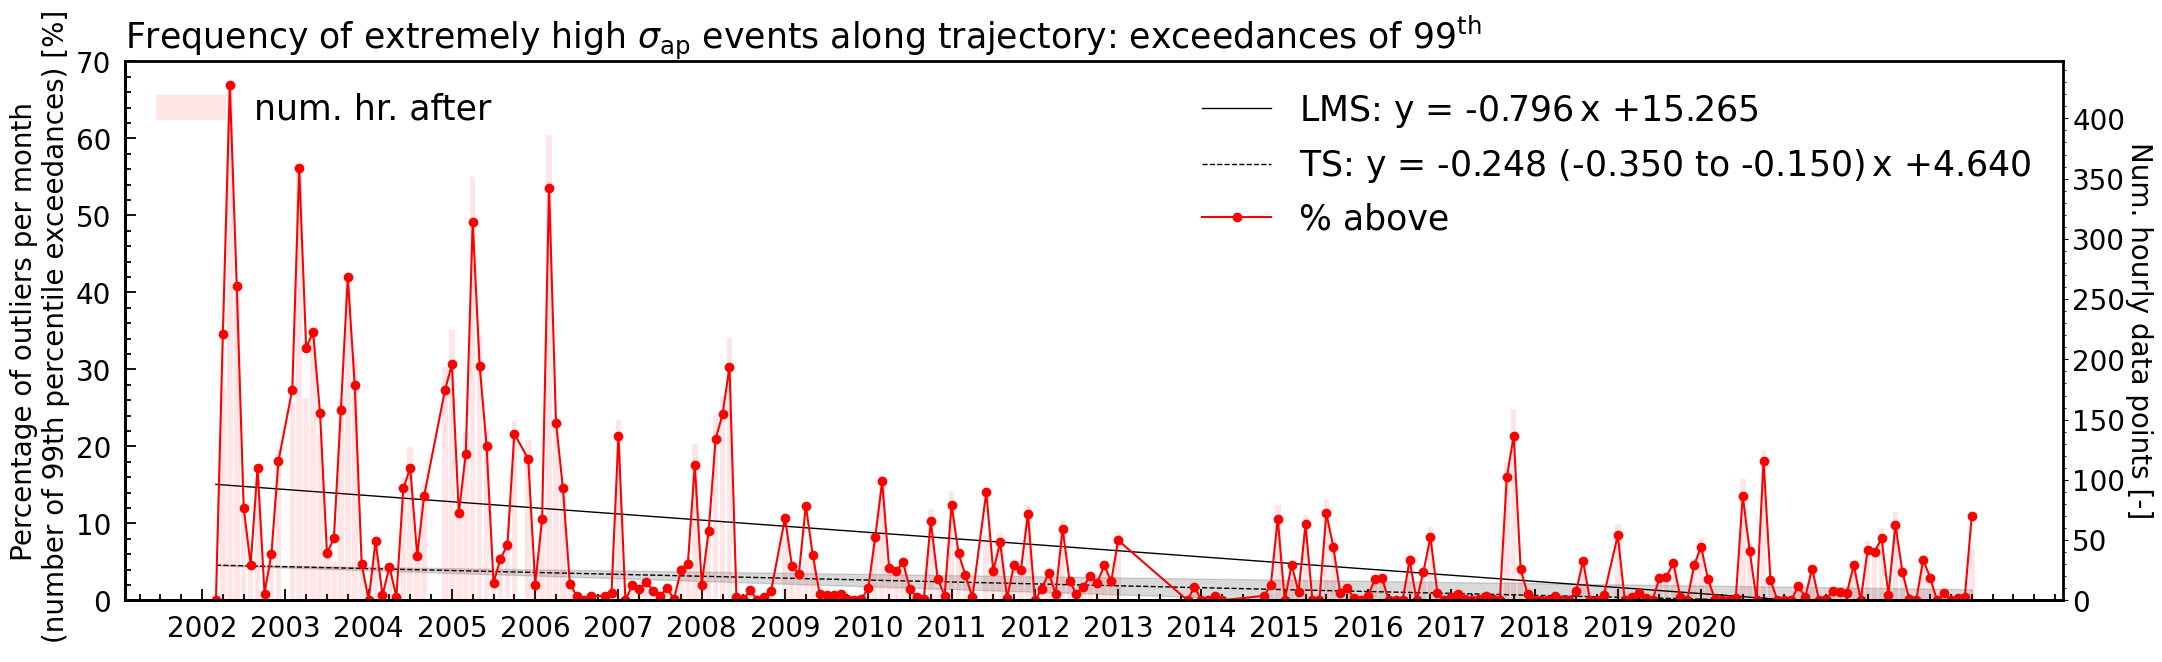

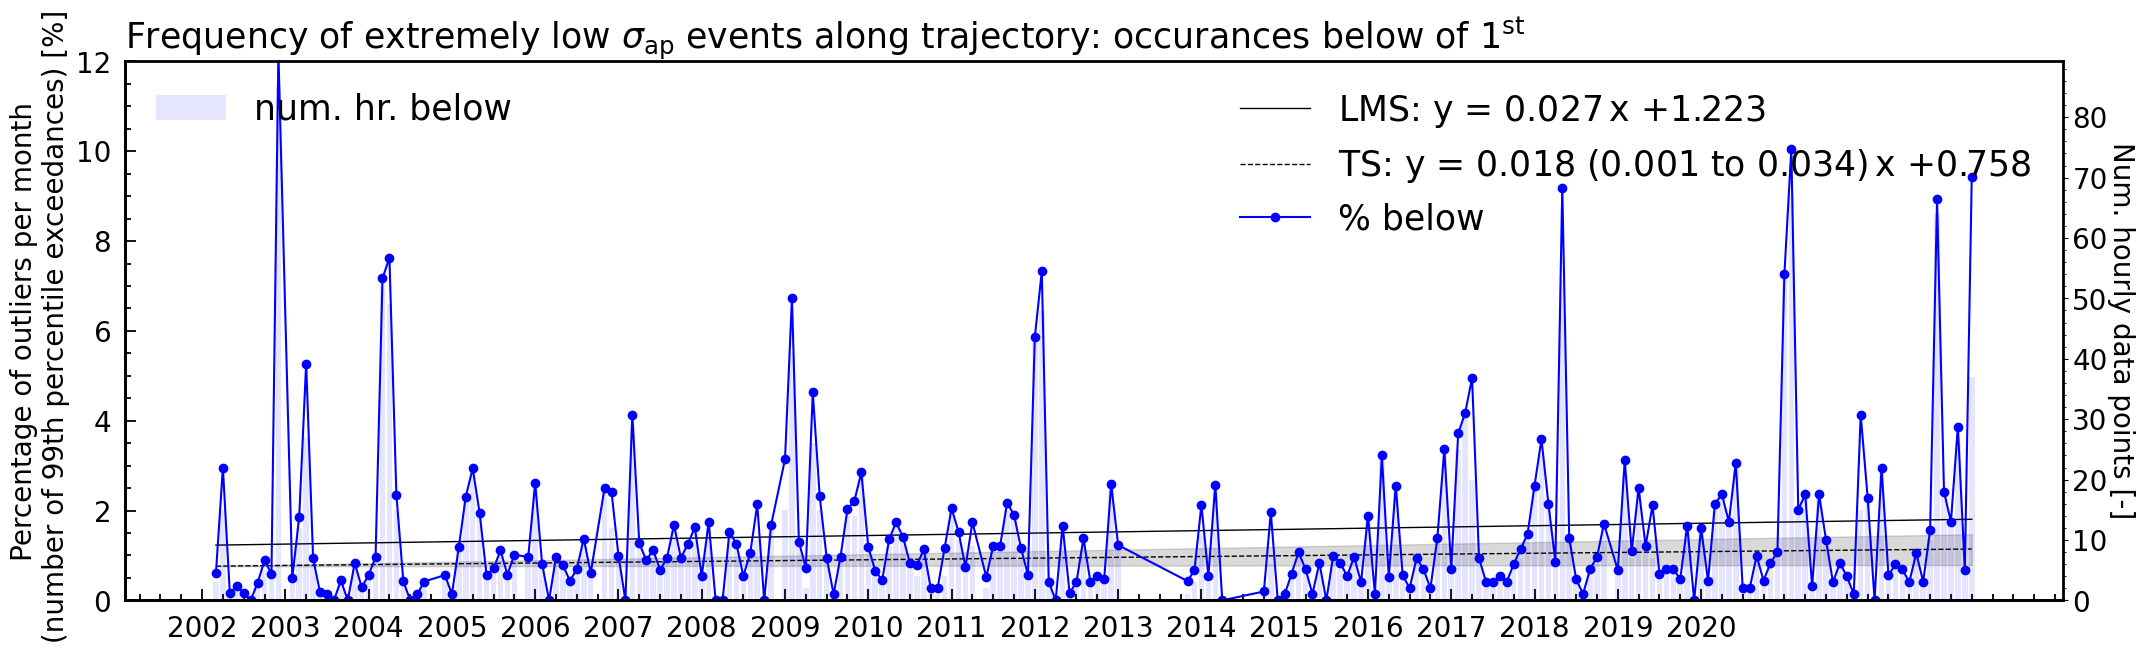

['C:\\Users\\DominicHeslinRees\\Pictures\\black_carbon\\final_plots']
make folder
saved as: C:\Users\DominicHeslinRees\Pictures\black_carbon\final_plots\\monthly_freq_abs_high_outliers.jpeg
['C:\\Users\\DominicHeslinRees\\Pictures\\black_carbon\\final_plots']
make folder
saved as: C:\Users\DominicHeslinRees\Pictures\black_carbon\final_plots\\monthly_freq_abs_low_outliers.jpeg


In [35]:
fig_high, fig_low = extremes.find_fractions_plot(df_add_DOY_quantile_abs, var='abs637', resolution='month_ordinal',
                        events='$\sigma_{\mathrm{ap}}$', percentile=99, ymax_high=70, ymax_low=12, plot_bottom=False,
                        plot_top=False)
extremes.save_plot(fig_high, name='monthly_freq_abs_high_outliers')
extremes.save_plot(fig_low, name='monthly_freq_abs_low_outliers')

Frequency: 12


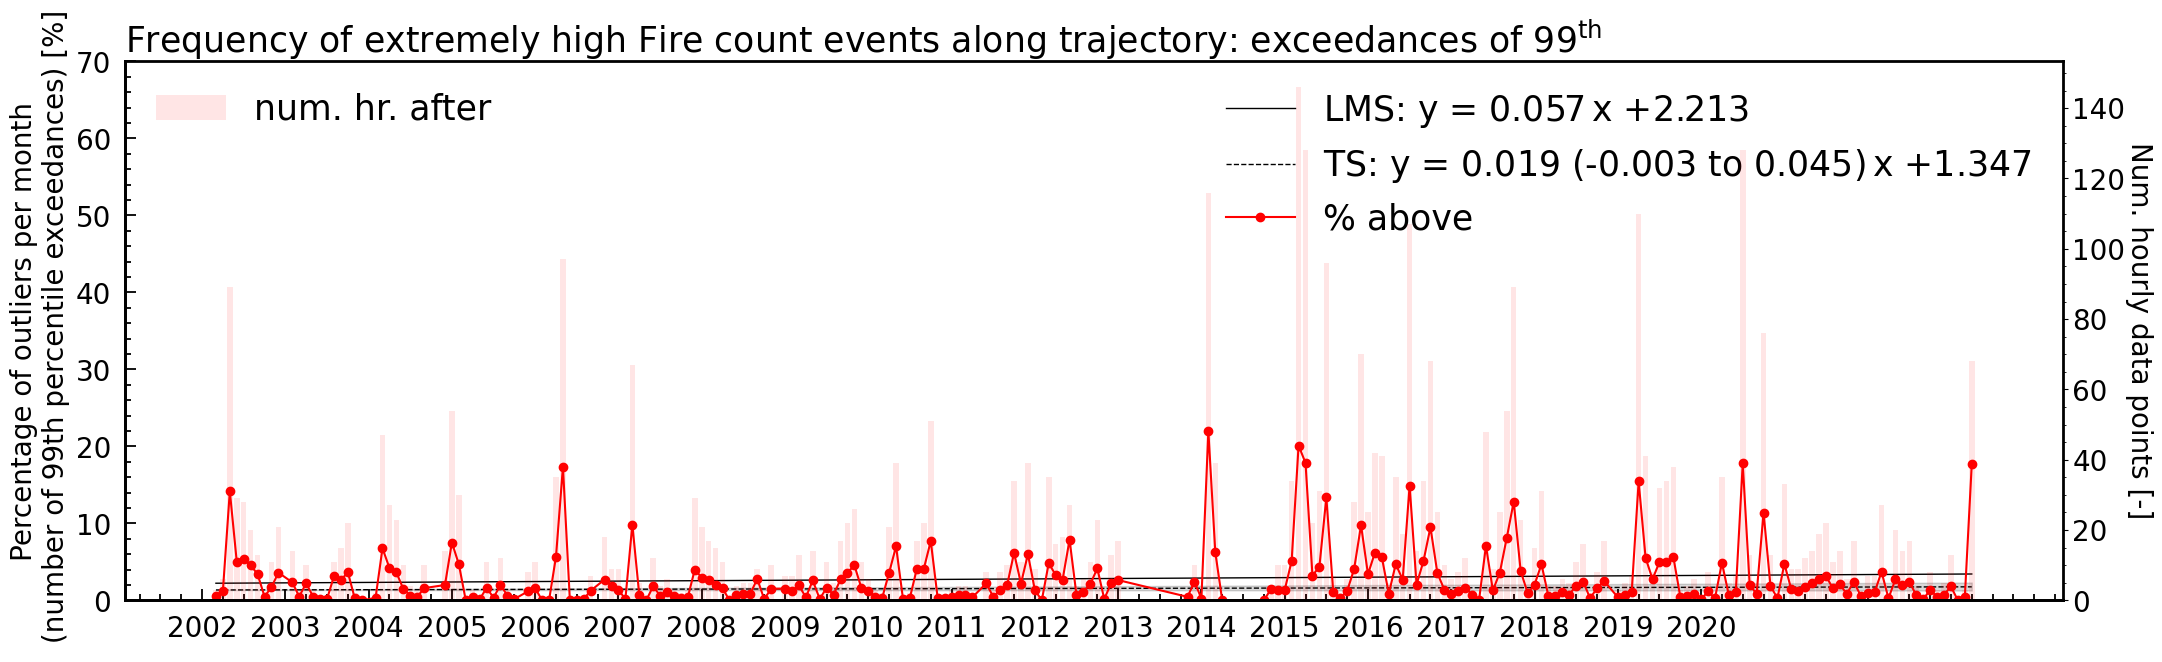

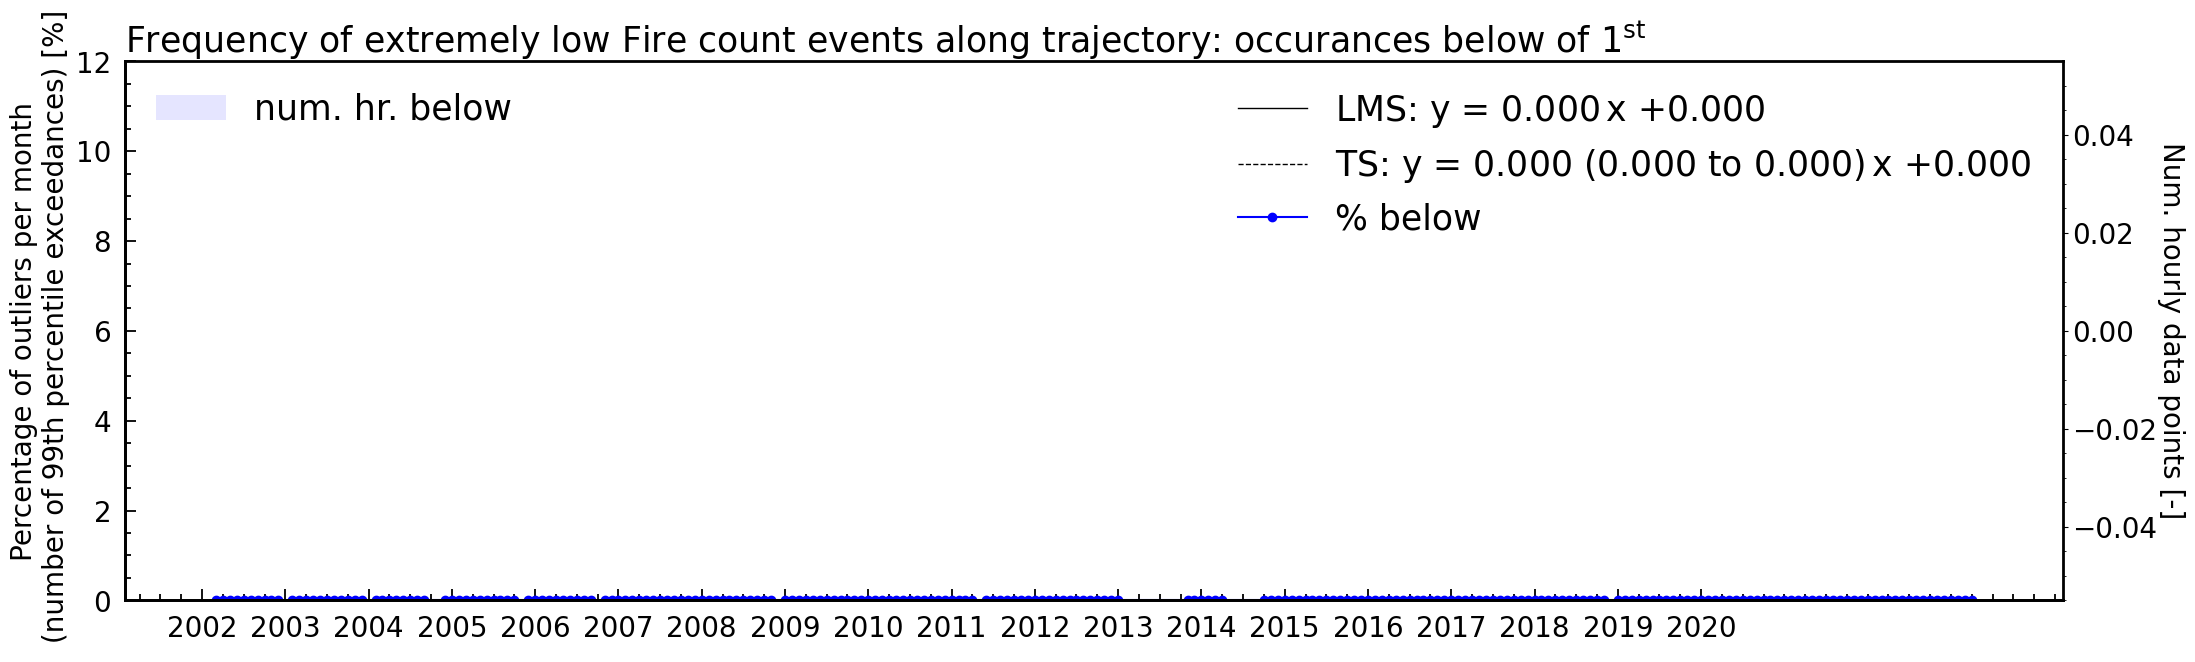

['C:\\Users\\DominicHeslinRees\\Pictures\\black_carbon\\final_plots']
make folder
saved as: C:\Users\DominicHeslinRees\Pictures\black_carbon\final_plots\\monthly_freq_fire_high_outliers.jpeg
['C:\\Users\\DominicHeslinRees\\Pictures\\black_carbon\\final_plots']
make folder
saved as: C:\Users\DominicHeslinRees\Pictures\black_carbon\final_plots\\monthly_freq_fire_low_outliers.jpeg


In [36]:
fig_high, fig_low = extremes.find_fractions_plot(df_add_DOY_quantile_fire, var=var_fire, resolution='month_ordinal',
                        events='Fire count', percentile=99, ymax_high=70, ymax_low=12, plot_bottom=False,
                        plot_top=False)
extremes.save_plot(fig_high, name='monthly_freq_fire_high_outliers')
extremes.save_plot(fig_low, name='monthly_freq_fire_low_outliers')

# Low abs with high rain: 

In [37]:
df_add_DOY_quantile_extremes_rain = df_add_DOY_quantile_rain[[str(var_rain),'timestamp','outlier']].copy()
df_add_DOY_quantile_extremes_abs = df_add_DOY_quantile_abs[['abs637','timestamp','outlier']].copy()
df_add_DOY_quantile_extremes_fire = df_add_DOY_quantile_fire[[str(var_fire),'timestamp','outlier']].copy()

df_add_DOY_quantile_extremes_rain = df_add_DOY_quantile_extremes_rain.set_index('timestamp')
df_add_DOY_quantile_extremes_abs = df_add_DOY_quantile_extremes_abs.set_index('timestamp')
df_add_DOY_quantile_extremes_fire = df_add_DOY_quantile_extremes_fire.set_index('timestamp')

df_rain_extremes = df_add_DOY_quantile_extremes_rain.copy()
df_abs637_extremes = df_add_DOY_quantile_extremes_abs.copy()
df_fire_extremes = df_add_DOY_quantile_extremes_fire.copy()

In [38]:
df_abs637_extremes.outlier.unique()
df_abs637_low = df_abs637_extremes[df_abs637_extremes['outlier'] == -1].copy() 
df_abs637_high = df_abs637_extremes[df_abs637_extremes['outlier'] == 1].copy() 

print("Length of abs low: "+str(len(df_abs637_low)))
print("Length of abs high: "+str(len(df_abs637_high)))

df_rain_extremes.outlier.unique()
df_rain_low = df_rain_extremes[df_rain_extremes['outlier'] == -1].copy() 
df_rain_high = df_rain_extremes[df_rain_extremes['outlier'] == 1].copy() 

print(len(df_rain_high)/len(df_rain_extremes))

print("Length of rain low: "+str(len(df_rain_low)))
print("Length of rain high: "+str(len(df_rain_high)))

df_low_abs_high_rain = extremes.merge_dfs(df_abs637_low[['abs637']], df_rain_high[[var_rain]])
print("Length of low abs and rain high: "+str(len(df_low_abs_high_rain)))
df_high_abs_low_rain = extremes.merge_dfs(df_abs637_high[['abs637']], df_rain_low[[var_rain]])
print("Length of high abs and rain low: "+str(len(df_high_abs_low_rain)))

Length of abs low: 2327
Length of abs high: 10188
0.08621071349506174
Length of rain low: 7001
Length of rain high: 12072
Length of low abs and rain high: 443
Length of high abs and rain low: 784


In [39]:
df_rain_extremes = df_rain_extremes.rename(columns={'outlier':'outlier_rain'})
df_abs637_extremes = df_abs637_extremes.rename(columns={'outlier':'outlier_abs'})
df_fire_extremes = df_fire_extremes.rename(columns={'outlier':'outlier_fire'})

df_abs637_rain_extremes  = extremes.merge_dfs(df_rain_extremes, df_abs637_extremes)
df_abs637_fire_extremes  = extremes.merge_dfs(df_fire_extremes, df_abs637_extremes)

In [40]:
def get_full_season_abb_years(start_year, number_years, first_season):
    """loops through the years and the seasons to get a full mapping for the season and year and it's respective order"""   
    season_list=['AHZ','SUM','SBU']
    season_abb_years = []    
    if first_season == 'SBU':
        print(first_season)
        number_years = number_years + 1
        print(start_year)
    for year in np.arange(start_year, start_year+number_years+1, 1):
        for season_abb in season_list: #correct order
            season_abb_year = str(season_abb) + '_' + str(year)            
            season_abb_years.append(season_abb_year)
            if season_abb == 'SBU':
                break
    index = [idx for idx, s in enumerate(season_abb_years) if str(first_season) in s][0]
    season_abb_years = season_abb_years[index:]
    seasons_num = np.arange(1,len(season_abb_years)+1,1)
    season_to_season_num = dict(zip(season_abb_years, seasons_num))
    return season_to_season_num

In [41]:
full_season_to_season_num = get_full_season_abb_years(start_year=2002, number_years=21, first_season='AHZ')
print(full_season_to_season_num)

{'AHZ_2002': 1, 'SUM_2002': 2, 'SBU_2002': 3, 'AHZ_2003': 4, 'SUM_2003': 5, 'SBU_2003': 6, 'AHZ_2004': 7, 'SUM_2004': 8, 'SBU_2004': 9, 'AHZ_2005': 10, 'SUM_2005': 11, 'SBU_2005': 12, 'AHZ_2006': 13, 'SUM_2006': 14, 'SBU_2006': 15, 'AHZ_2007': 16, 'SUM_2007': 17, 'SBU_2007': 18, 'AHZ_2008': 19, 'SUM_2008': 20, 'SBU_2008': 21, 'AHZ_2009': 22, 'SUM_2009': 23, 'SBU_2009': 24, 'AHZ_2010': 25, 'SUM_2010': 26, 'SBU_2010': 27, 'AHZ_2011': 28, 'SUM_2011': 29, 'SBU_2011': 30, 'AHZ_2012': 31, 'SUM_2012': 32, 'SBU_2012': 33, 'AHZ_2013': 34, 'SUM_2013': 35, 'SBU_2013': 36, 'AHZ_2014': 37, 'SUM_2014': 38, 'SBU_2014': 39, 'AHZ_2015': 40, 'SUM_2015': 41, 'SBU_2015': 42, 'AHZ_2016': 43, 'SUM_2016': 44, 'SBU_2016': 45, 'AHZ_2017': 46, 'SUM_2017': 47, 'SBU_2017': 48, 'AHZ_2018': 49, 'SUM_2018': 50, 'SBU_2018': 51, 'AHZ_2019': 52, 'SUM_2019': 53, 'SBU_2019': 54, 'AHZ_2020': 55, 'SUM_2020': 56, 'SBU_2020': 57, 'AHZ_2021': 58, 'SUM_2021': 59, 'SBU_2021': 60, 'AHZ_2022': 61, 'SUM_2022': 62, 'SBU_2022': 63, 

In [42]:
df_abs637_rain_extremes.head(2)

tp_era5  outlier_rain  abs637  outlier_abs
timestamp                                                       
2002-03-08 14:00:00  6.328704             0   0.238            0
2002-03-08 15:00:00  6.259259             0   0.082            0

In [43]:
df_abs637_rain_extremes = extremes.add_year_month_ordinal(df_abs637_rain_extremes)

df_abs637_rain_extremes = extremes.create_month_season_numbers(df_abs637_rain_extremes, full_season_to_season_num)

df_abs637_fire_extremes = extremes.add_year_month_ordinal(df_abs637_fire_extremes)
df_abs637_fire_extremes = extremes.create_month_season_numbers(df_abs637_fire_extremes, full_season_to_season_num)

In [44]:
df_abs637_rain_extremes.season_ordinal[0]

1

In [45]:
#low abs
df_abs637_low_extremes = df_abs637_rain_extremes[df_abs637_rain_extremes['outlier_abs'] == -1]
# high abs
df_abs637_high_extremes = df_abs637_rain_extremes[df_abs637_rain_extremes['outlier_abs'] == 1]

#low abs
df_abs637_low_extremes_fire = df_abs637_fire_extremes[df_abs637_fire_extremes['outlier_abs'] == -1]
# high abs
df_abs637_high_extremes_fire = df_abs637_fire_extremes[df_abs637_fire_extremes['outlier_abs'] == 1]

In [46]:
df_abs637_high_extremes.tail(2)

tp_era5  outlier_rain  abs637  outlier_abs  \
timestamp                                                          
2023-04-16 03:00:00  7.935185             0   0.814            1   
2023-04-16 04:00:00  5.481481             0   0.650            1   

                              timestamp  day  month  year  year_num  \
timestamp                                                             
2023-04-16 03:00:00 2023-04-16 03:00:00   16      4  2023        22   
2023-04-16 04:00:00 2023-04-16 04:00:00   16      4  2023        22   

                     month_ordinal  month_num season_abb  season_name  \
timestamp                                                               
2023-04-16 03:00:00            256          4        AHZ  Arctic Haze   
2023-04-16 04:00:00            256          4        AHZ  Arctic Haze   

                    season_abb_year  season_ordinal  
timestamp                                            
2023-04-16 03:00:00        AHZ_2023              64  
2023-04-16 04:00:00        AHZ_2023              64

In [47]:
df_abs637_low_extremes.head(2)

tp_era5  outlier_rain  abs637  outlier_abs  \
timestamp                                                          
2002-03-22 01:00:00  5.134259             0   0.005           -1   
2002-03-24 13:00:00  2.835648             0   0.005           -1   

                              timestamp  day  month  year  year_num  \
timestamp                                                             
2002-03-22 01:00:00 2002-03-22 01:00:00   22      3  2002         1   
2002-03-24 13:00:00 2002-03-24 13:00:00   24      3  2002         1   

                     month_ordinal  month_num season_abb  season_name  \
timestamp                                                               
2002-03-22 01:00:00              3          3        AHZ  Arctic Haze   
2002-03-24 13:00:00              3          3        AHZ  Arctic Haze   

                    season_abb_year  season_ordinal  
timestamp                                            
2002-03-22 01:00:00        AHZ_2002               1  
2002-03-24 13:00:00        AHZ_2002               1

In [48]:
df_abs637_low_extremes_fire.head(2)

BC_GFED  outlier_fire  abs637  outlier_abs  \
timestamp                                                         
2002-03-22 01:00:00      0.0             0   0.005           -1   
2002-03-24 13:00:00      0.0             0   0.005           -1   

                              timestamp  day  month  year  year_num  \
timestamp                                                             
2002-03-22 01:00:00 2002-03-22 01:00:00   22      3  2002         1   
2002-03-24 13:00:00 2002-03-24 13:00:00   24      3  2002         1   

                     month_ordinal  month_num season_abb  season_name  \
timestamp                                                               
2002-03-22 01:00:00              3          3        AHZ  Arctic Haze   
2002-03-24 13:00:00              3          3        AHZ  Arctic Haze   

                    season_abb_year  season_ordinal  
timestamp                                            
2002-03-22 01:00:00        AHZ_2002               1  
2002-03-24 13:00:00        AHZ_2002               1

## High abs of which are rain outliers: 

In [49]:
df_proportion_of_high_abs_season_outliers = extremes.produce_proportion_of_extremes_related_to_extremes(df_abs637_high_extremes, 
                                                                                                    resolution='season_ordinal')
print(df_proportion_of_high_abs_season_outliers.mean())

season_ordinal      33.152542
rain_outlier_0      84.824861
rain_outlier_1       8.693257
rain_outlier_-1      6.481882
sum                148.559322
dtype: float64


## High abs of which are fire outliers: 

In [50]:
df_proportion_of_high_abs_season_fire_outliers = extremes.produce_proportion_of_extremes_related_to_extremes(df_abs637_high_extremes_fire, 
                                                                                                    resolution='season_ordinal',
                                                                                                       outlier_var='fire')
print(df_proportion_of_high_abs_season_fire_outliers.mean())

season_ordinal      32.344262
fire_outlier_0      90.804801
fire_outlier_1       9.195199
fire_outlier_-1      0.000000
sum                165.868852
dtype: float64


## Low abs of which are rain outliers: 

In [51]:
df_proportion_of_low_abs_season_outliers = extremes.produce_proportion_of_extremes_related_to_extremes(df_abs637_low_extremes, 
                                                                                                    resolution='season_ordinal')
print(df_proportion_of_low_abs_season_outliers.mean())

season_ordinal     33.152542
rain_outlier_0     80.993043
rain_outlier_1     18.054243
rain_outlier_-1     0.952714
sum                36.016949
dtype: float64


## Low abs of which are fire outliers: 

In [52]:
df_abs637_low_extremes_fire.head(2)

BC_GFED  outlier_fire  abs637  outlier_abs  \
timestamp                                                         
2002-03-22 01:00:00      0.0             0   0.005           -1   
2002-03-24 13:00:00      0.0             0   0.005           -1   

                              timestamp  day  month  year  year_num  \
timestamp                                                             
2002-03-22 01:00:00 2002-03-22 01:00:00   22      3  2002         1   
2002-03-24 13:00:00 2002-03-24 13:00:00   24      3  2002         1   

                     month_ordinal  month_num season_abb  season_name  \
timestamp                                                               
2002-03-22 01:00:00              3          3        AHZ  Arctic Haze   
2002-03-24 13:00:00              3          3        AHZ  Arctic Haze   

                    season_abb_year  season_ordinal  
timestamp                                            
2002-03-22 01:00:00        AHZ_2002               1  
2002-03-24 13:00:00        AHZ_2002               1

In [53]:
df_proportion_of_low_abs_season_fire_outliers = extremes.produce_proportion_of_extremes_related_to_extremes(df_abs637_low_extremes_fire, 
                                                                                                    resolution='season_ordinal', 
                                                                                                           outlier_var='fire')
print(df_proportion_of_low_abs_season_fire_outliers.mean())

season_ordinal     32.344262
fire_outlier_0     97.605700
fire_outlier_1      2.394300
fire_outlier_-1     0.000000
sum                37.442623
dtype: float64


# Proportion of the low abs extremes: 

In [54]:
df_proportion_of_high_abs_season_outliers.head(2)

season_ordinal  rain_outlier_0  rain_outlier_1  rain_outlier_-1  sum
0               1       91.196013        1.328904         7.475083  602
1               2       97.742664        1.128668         1.128668  443

<function produce_res_stacked_bar_with_trends_plot at 0x0000015421303430>


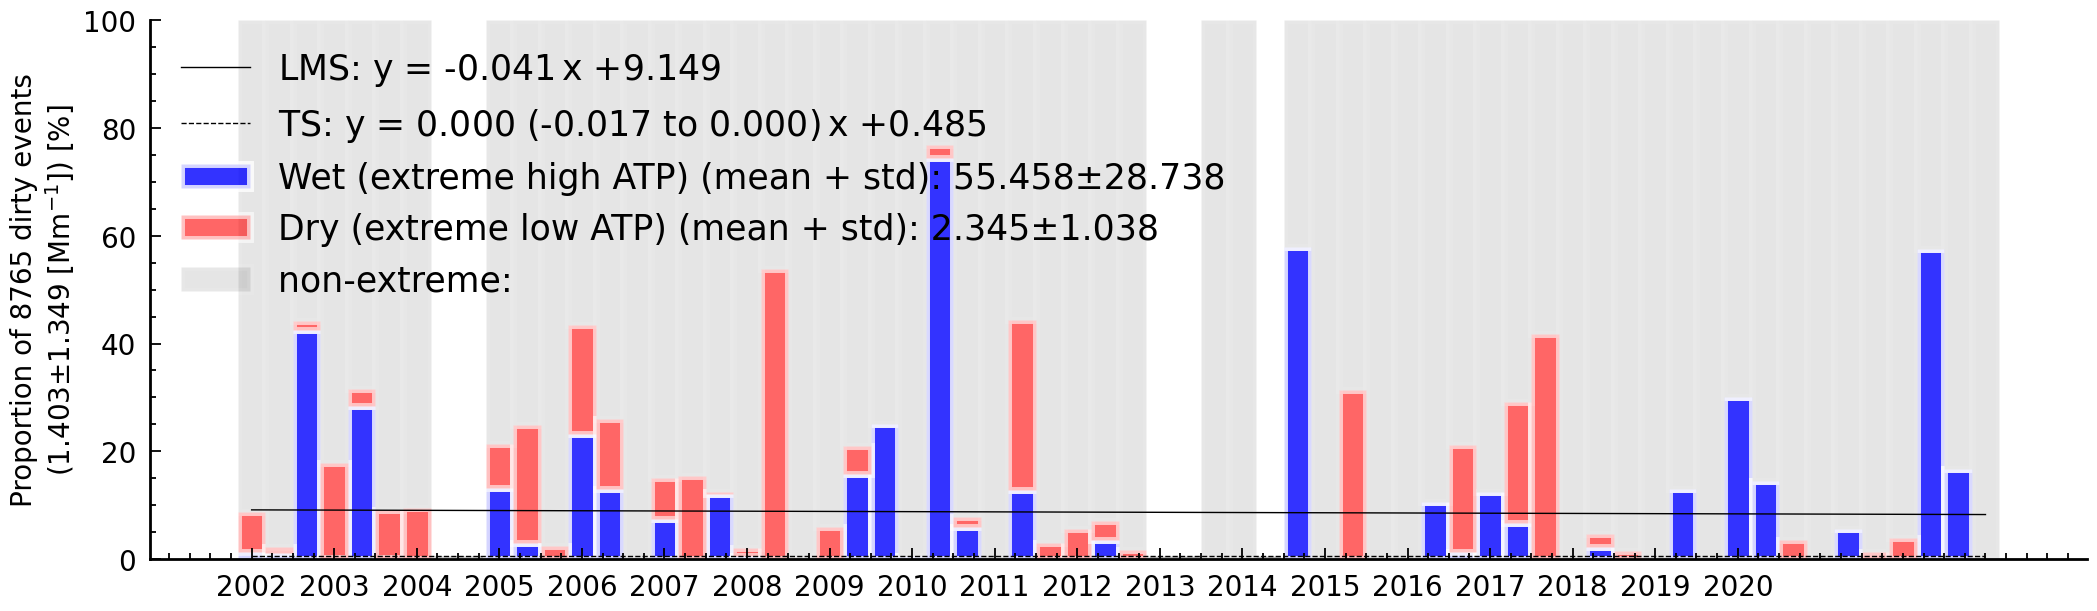

In [55]:
fig = extremes.produce_res_stacked_bar_with_trends_plot(df_proportion_of_high_abs_season_outliers, var='rain_outlier_1', 
                    resolution="season_ordinal", freq=3, col_list = ['rain_outlier_1', 'rain_outlier_-1', 'rain_outlier_0'],
                    alphas = [0.8, 0.6, 0.1], colors=['blue', 'red', 'black'], 
                    event_type='dirty events', title='', df_full=df_abs637_high_extremes, start_year=2002,
                    ymax=100, var_full='tp_era5')

In [56]:
df_proportion_of_high_abs_season_outliers.mean()

season_ordinal      33.152542
rain_outlier_0      84.824861
rain_outlier_1       8.693257
rain_outlier_-1      6.481882
sum                148.559322
dtype: float64

In [57]:
df_proportion_of_low_abs_season_outliers.head(2)

season_ordinal  rain_outlier_0  rain_outlier_1  rain_outlier_-1  sum
0               1       84.210526       15.789474              0.0   19
1               2      100.000000        0.000000              0.0    5

## Figure S15: 

<function produce_res_stacked_bar_with_trends_plot at 0x0000015421303430>


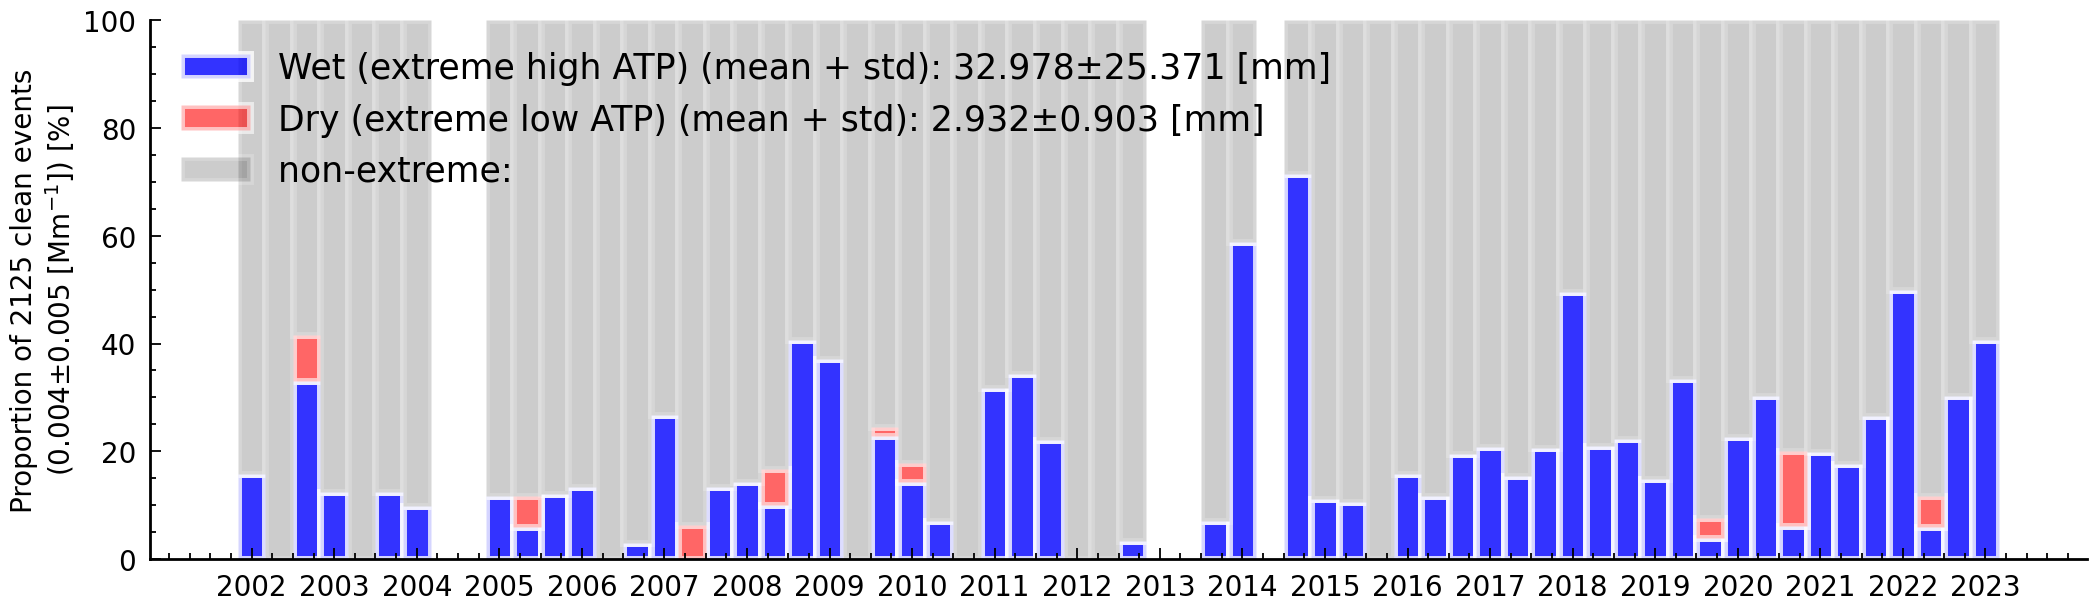

['C:\\Users\\DominicHeslinRees\\Documents\\ACP_2023\\plots']
make folder
saved as: C:\Users\DominicHeslinRees\Documents\ACP_2023\plots\\FigureS15.png


In [58]:
fig = extremes.produce_res_stacked_bar_with_trends_plot(df_proportion_of_low_abs_season_outliers, var='rain_outlier_1', 
                    resolution="season_ordinal", 
                    freq=3, col_list = ['rain_outlier_1', 'rain_outlier_-1', 'rain_outlier_0'],
                    alphas = [0.8, 0.6, 0.2], colors=['blue', 'red', 'black'], df_full=df_abs637_low_extremes, title='', 
                    ymax=100, start_year=2002, var_full=var_rain, end_year=2024,
                    plot_LMS=False, plot_TS=False, units='[mm]')
extremes.save_plot(fig, savepath_plot, name='FigureS15', formate='.png', dpi=300)

In [59]:
df_proportion_of_low_abs_season_outliers.mean()

season_ordinal     33.152542
rain_outlier_0     80.993043
rain_outlier_1     18.054243
rain_outlier_-1     0.952714
sum                36.016949
dtype: float64

In [60]:
df_proportion_of_high_abs_season_fire_outliers.head(2)

season_ordinal  fire_outlier_0  fire_outlier_1  fire_outlier_-1  sum
0               1       98.172757        1.827243              0.0  602
1               2       99.322799        0.677201              0.0  443

<function produce_res_stacked_bar_with_trends_plot at 0x0000015421303430>


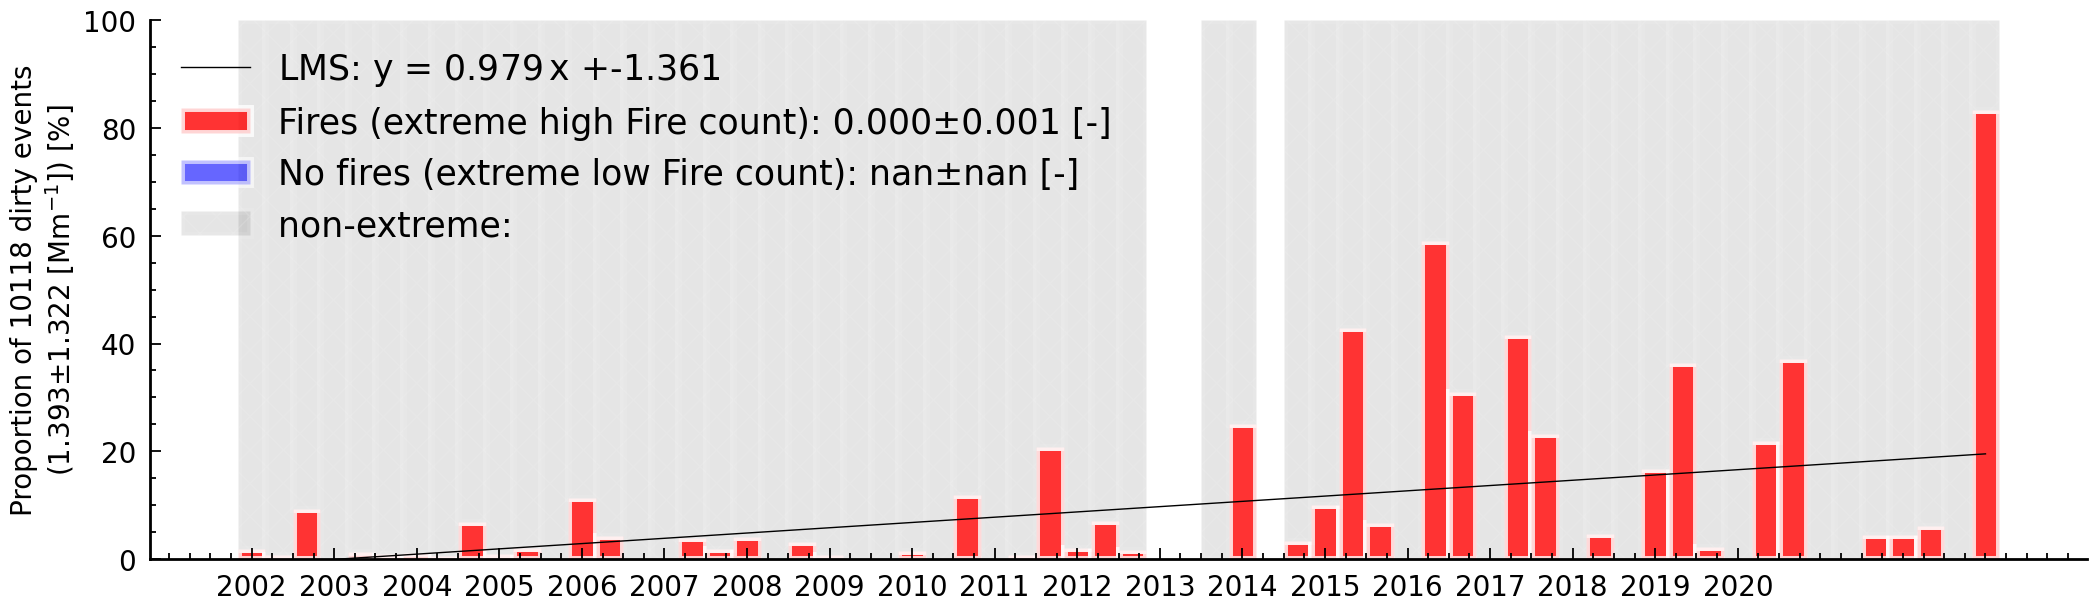

['C:\\Users\\DominicHeslinRees\\Pictures\\black_carbon\\final_plots']
make folder
saved as: C:\Users\DominicHeslinRees\Pictures\black_carbon\final_plots\\proportion_of_high_abs_season_outliers_fires_updated.jpeg


In [61]:
fig = extremes.produce_res_stacked_bar_with_trends_plot(df_proportion_of_high_abs_season_fire_outliers, var='fire_outlier_1', 
                    resolution="season_ordinal", 
                    freq=3, col_list = ['fire_outlier_1', 'fire_outlier_-1', 'fire_outlier_0'],
                    labels = ['Fires (extreme high Fire count)', 'No fires (extreme low Fire count)', 'non-extreme'],
                    alphas = [0.8, 0.6, 0.1], colors=['red', 'blue', 'black'], hatches=['','','x'],
                    event_type='dirty events', title='', df_full=df_abs637_high_extremes_fire, var_full=var_fire,
                    ymax=100, plot_LMS=True, plot_TS=False, units='[-]',)

extremes.save_plot(fig, name='proportion_of_high_abs_season_outliers_fires_updated')

In [62]:
df_proportion_of_high_abs_season_fire_outliers.mean()

season_ordinal      32.344262
fire_outlier_0      90.804801
fire_outlier_1       9.195199
fire_outlier_-1      0.000000
sum                165.868852
dtype: float64

In [63]:
df_proportion_of_high_abs_season_fire_outliers.head(2)

season_ordinal  fire_outlier_0  fire_outlier_1  fire_outlier_-1  sum
0               1       98.172757        1.827243              0.0  602
1               2       99.322799        0.677201              0.0  443

<function produce_res_stacked_bar_with_trends_plot at 0x0000015421303430>


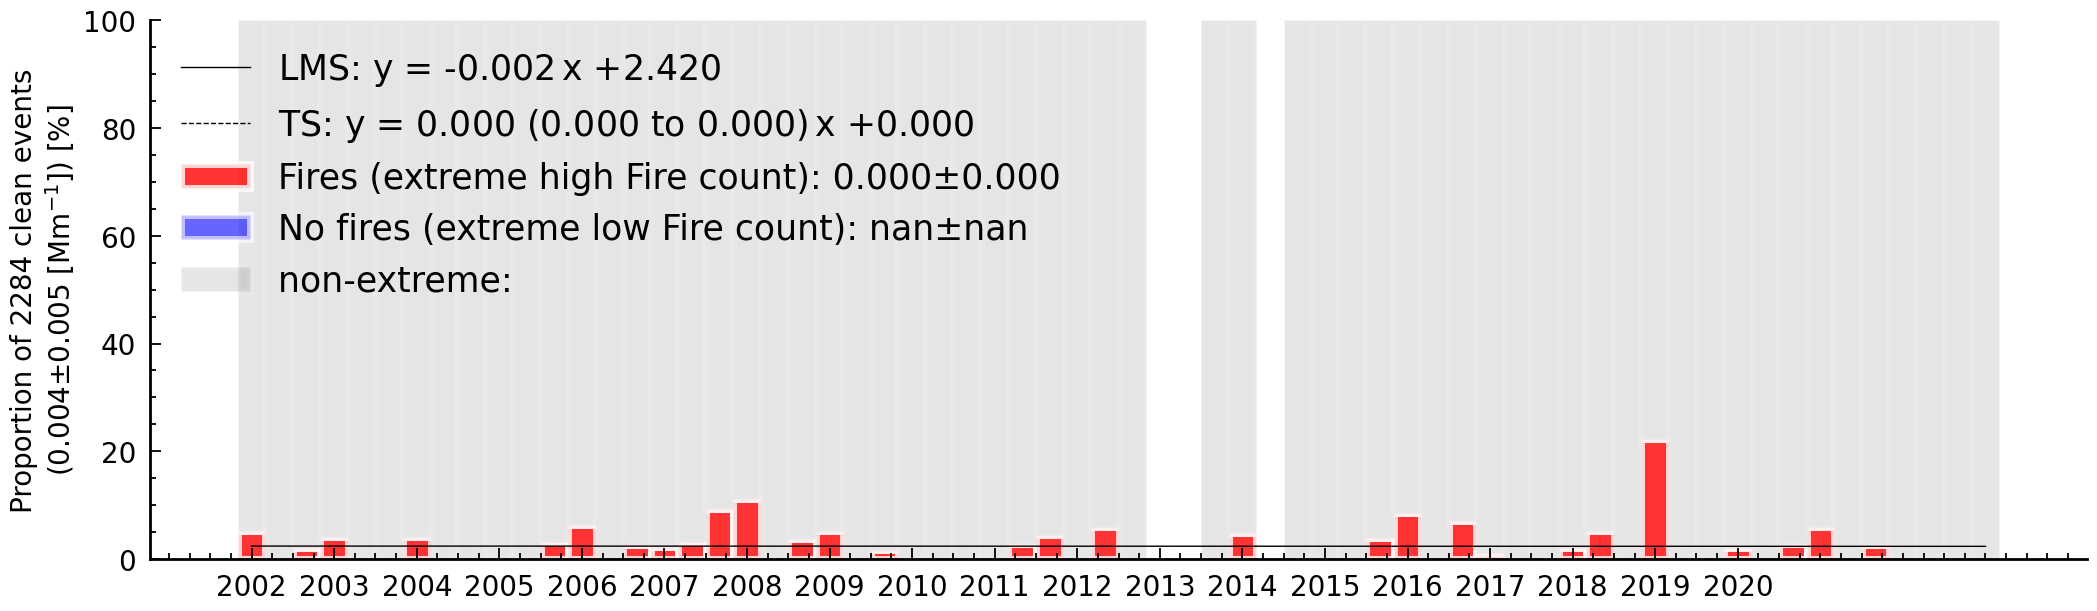

In [64]:
fig = extremes.produce_res_stacked_bar_with_trends_plot(df_proportion_of_low_abs_season_fire_outliers, var='fire_outlier_1', 
                    resolution="season_ordinal", 
                    freq=3, col_list = ['fire_outlier_1', 'fire_outlier_-1', 'fire_outlier_0'],
                    labels = ['Fires (extreme high Fire count)', 'No fires (extreme low Fire count)', 'non-extreme'],
                    alphas = [0.8, 0.6, 0.1], colors=['red', 'blue', 'black'], 
                    event_type='clean events', title='', df_full=df_abs637_low_extremes_fire, var_full=var_fire,
                    ymax=100)

# Save: 

In [65]:
extremes.save_df(df_add_DOY_quantile_extremes_abs, path=r'C:\Users\DominicHeslinRees\Documents\Analysis\HYSPLIT\extremes', 
          name='df_abs_extremes')
extremes.save_df(df_add_DOY_quantile_extremes_rain, path=r'C:\Users\DominicHeslinRees\Documents\Analysis\HYSPLIT\extremes', 
          name='df_rainfall_accumulated_extremes')

Save as: C:\Users\DominicHeslinRees\Documents\Analysis\HYSPLIT\extremes\df_abs_extremes.dat
Save as: C:\Users\DominicHeslinRees\Documents\Analysis\HYSPLIT\extremes\df_rainfall_accumulated_extremes.dat


In [66]:
var='abs637'; resolution='month_ordinal'

df_res_to_percentage_outliers = extremes.res_percentage_outliers(df_add_DOY_quantile_abs, var=var, resolution=resolution)
df_res_to_percentage_outliers = df_res_to_percentage_outliers.sort_values('resolution')
    